In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df_gamelogs = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/gamelogs_clean_withFP.csv')
df_gamelogs_team = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/gamelogs_fp_team_mean.csv')
df_clutch_rank = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/clutch_rank_target.csv')
df_trad = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/trad_rank_target.csv')
df_gamelogs_target = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/gamelogs_fp_targets.csv')
df_complete_target = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all_target.csv')
df_complete = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')

# ========================================================
# Time Series Modeling
# ========================================================

In [3]:
df_gamelogs.GAME_DATE = pd.to_datetime(df_gamelogs.GAME_DATE)
df_gamelogs.set_index('GAME_DATE', inplace=True)

In [4]:
df_gamelogs_team.GAME_DATE = pd.to_datetime(df_gamelogs_team.GAME_DATE)
df_gamelogs_team.set_index('GAME_DATE', inplace=True)

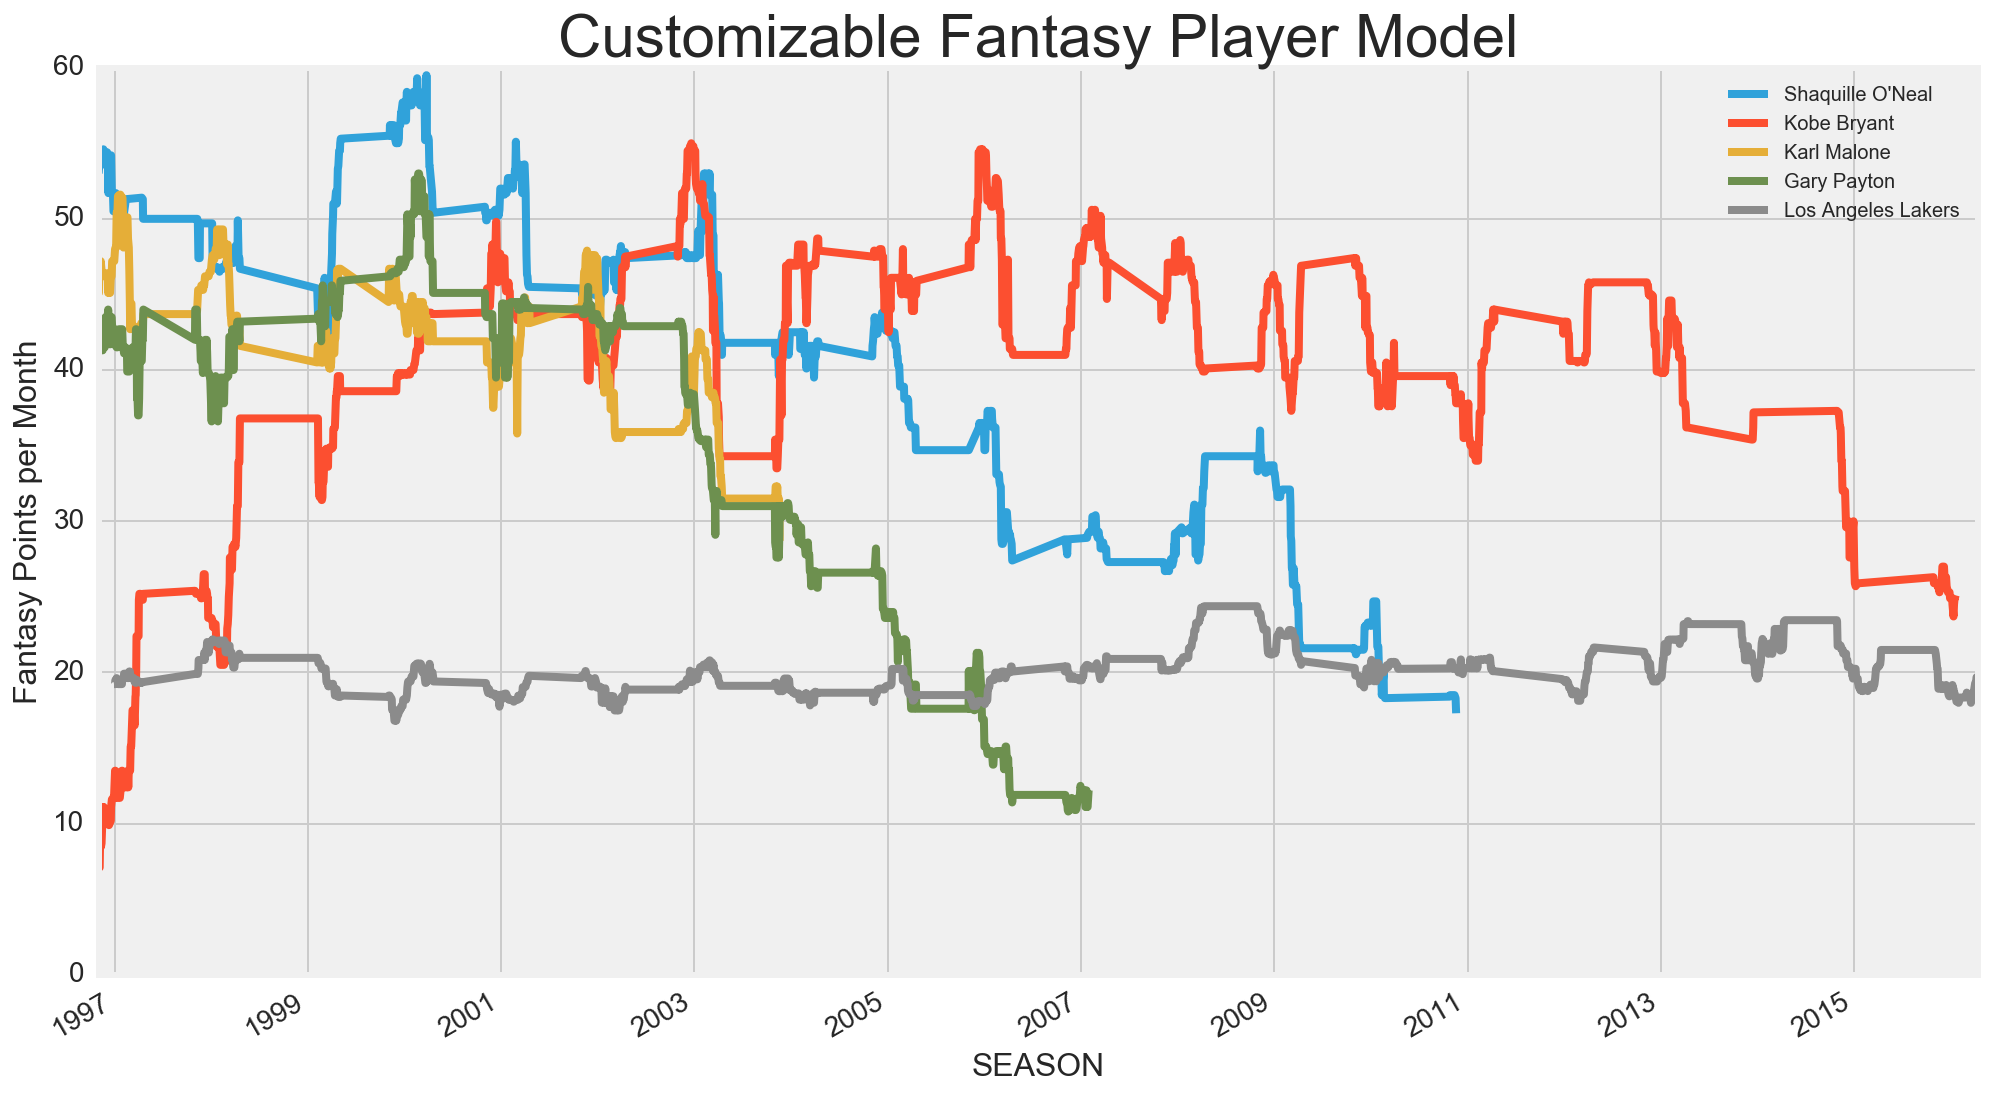

In [5]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Shaquille O'Neal"
Player2 = 'Kobe Bryant'
Player3 = 'Karl Malone'
Player4 = 'Gary Payton'
# Player5 = 'Derek Fisher'
Team    = 'Los Angeles Lakers'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player4)
# df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player5)
df_gamelogs_team[(df_gamelogs_team.TEAM_NAME == Team)]['fp_team_mean'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Team)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Customizable Fantasy Player Model', size=30)
plt.legend(loc='upper right')
plt.show()

In [6]:
df_player_compare = pd.DataFrame(df_gamelogs.groupby(['PLAYER_NAME'])['FP'].mean().reset_index())

In [7]:
df_player_compare.FP.mean()

12.716458591865958

In [8]:
df_player_compare.head()

,PLAYER_NAME,FP
0,A.C. Green,15.731398
1,A.J. Bramlett,4.175000
2,A.J. Guyton,9.962500
3,A.J. Price,11.394253
4,Aaron Brooks,18.235584


In [9]:
df_player_compare[(df_player_compare.FP >= 12.65) & (df_player_compare.FP <= 12.7)]

,PLAYER_NAME,FP
95,Anthony Johnson,12.684237
308,Christian Eyenga,12.694118
899,John Wallace,12.685564
973,Keith Bogans,12.687630


In [10]:
df_player_compare[df_player_compare.FP == df_player_compare.FP.max()]

,PLAYER_NAME,FP
1078,LeBron James,48.380344


In [11]:
df_player_compare[(df_player_compare.FP >= 9) & (df_player_compare.FP <= 9.05)]

,PLAYER_NAME,FP
241,Cartier Martin,9.033333
508,Dontonio Wingfield,9.034000
825,Jeff Withey,9.019863
1069,Larry Stewart,9.038571
1246,Mike Penberthy,9.017857
1277,Nate Huffman,9.014286
1395,Randy Livingston,9.024138
1470,Ronnie Price,9.007358


In [12]:
# Drop the 1 NaN value
df_complete.fp_mean.dropna(inplace=True)

In [13]:
df_player_compare[df_player_compare.FP <= np.percentile(df_complete['fp_mean'], 1)]

,PLAYER_NAME,FP
38,Alex Scales,0.000000
82,Andy Panko,0.000000
243,Casey Shaw,0.400000
289,Chris McCray,-0.400000
302,Chris Smith,0.000000
442,Deng Gai,0.000000
616,Gani Lawal,0.000000
703,Ibrahim Kutluay,-0.160000
774,JamesOn Curry,0.000000
909,Jonathan Kerner,0.000000


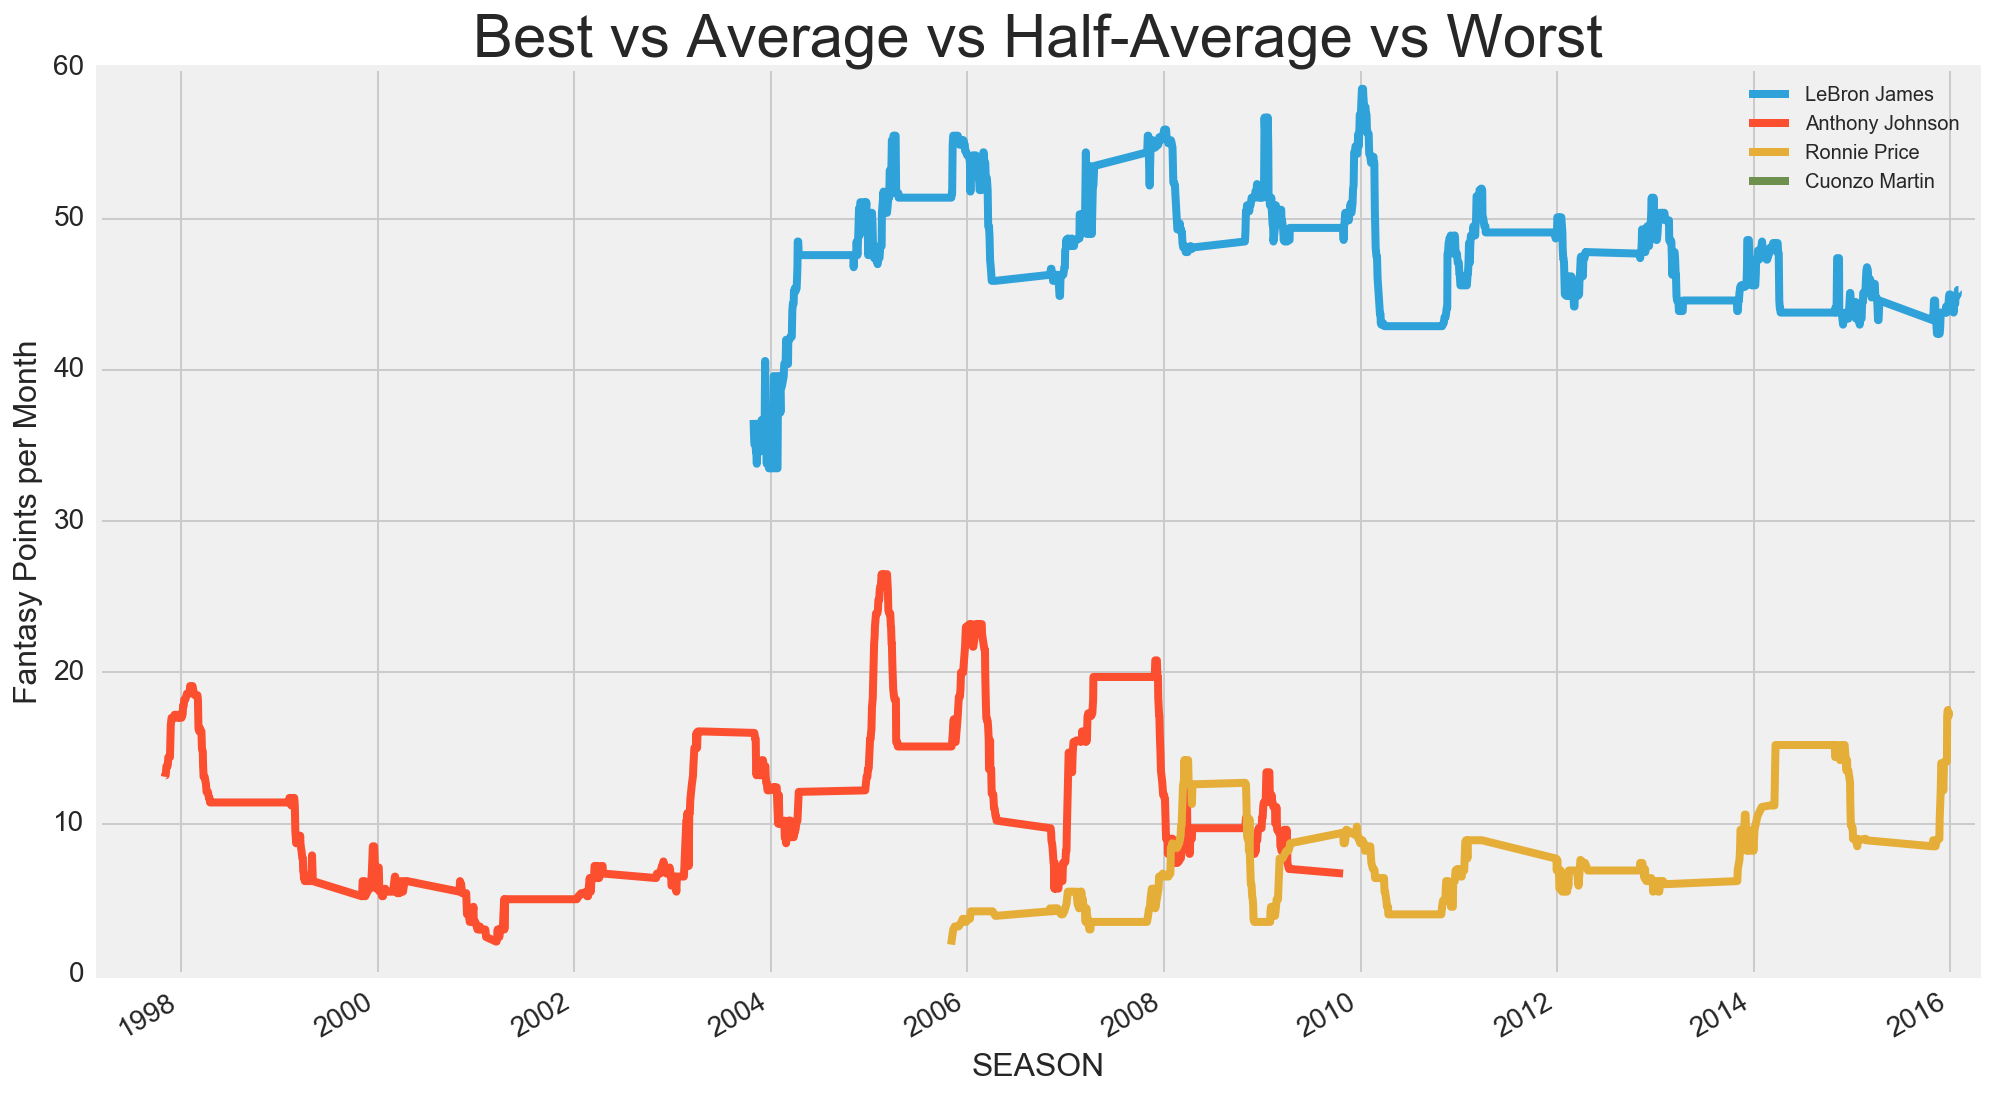

In [14]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "LeBron James"
Player2 = 'Anthony Johnson'
Player3 = 'Ronnie Price'
Player4 = 'Cuonzo Martin'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player4)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Best vs Average vs Half-Average vs Worst', size=30)
plt.legend(loc='upper right')
plt.show()

In [15]:
first_percentile_players = []
for name in df_player_compare[(df_player_compare.FP >= -1) & (df_player_compare.FP <= np.percentile(df_complete['fp_mean'], 1))].PLAYER_NAME:
    first_percentile_players.append(name)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=732269.0, right=732269.0
  'left=%s, right=%s') % (left, right))


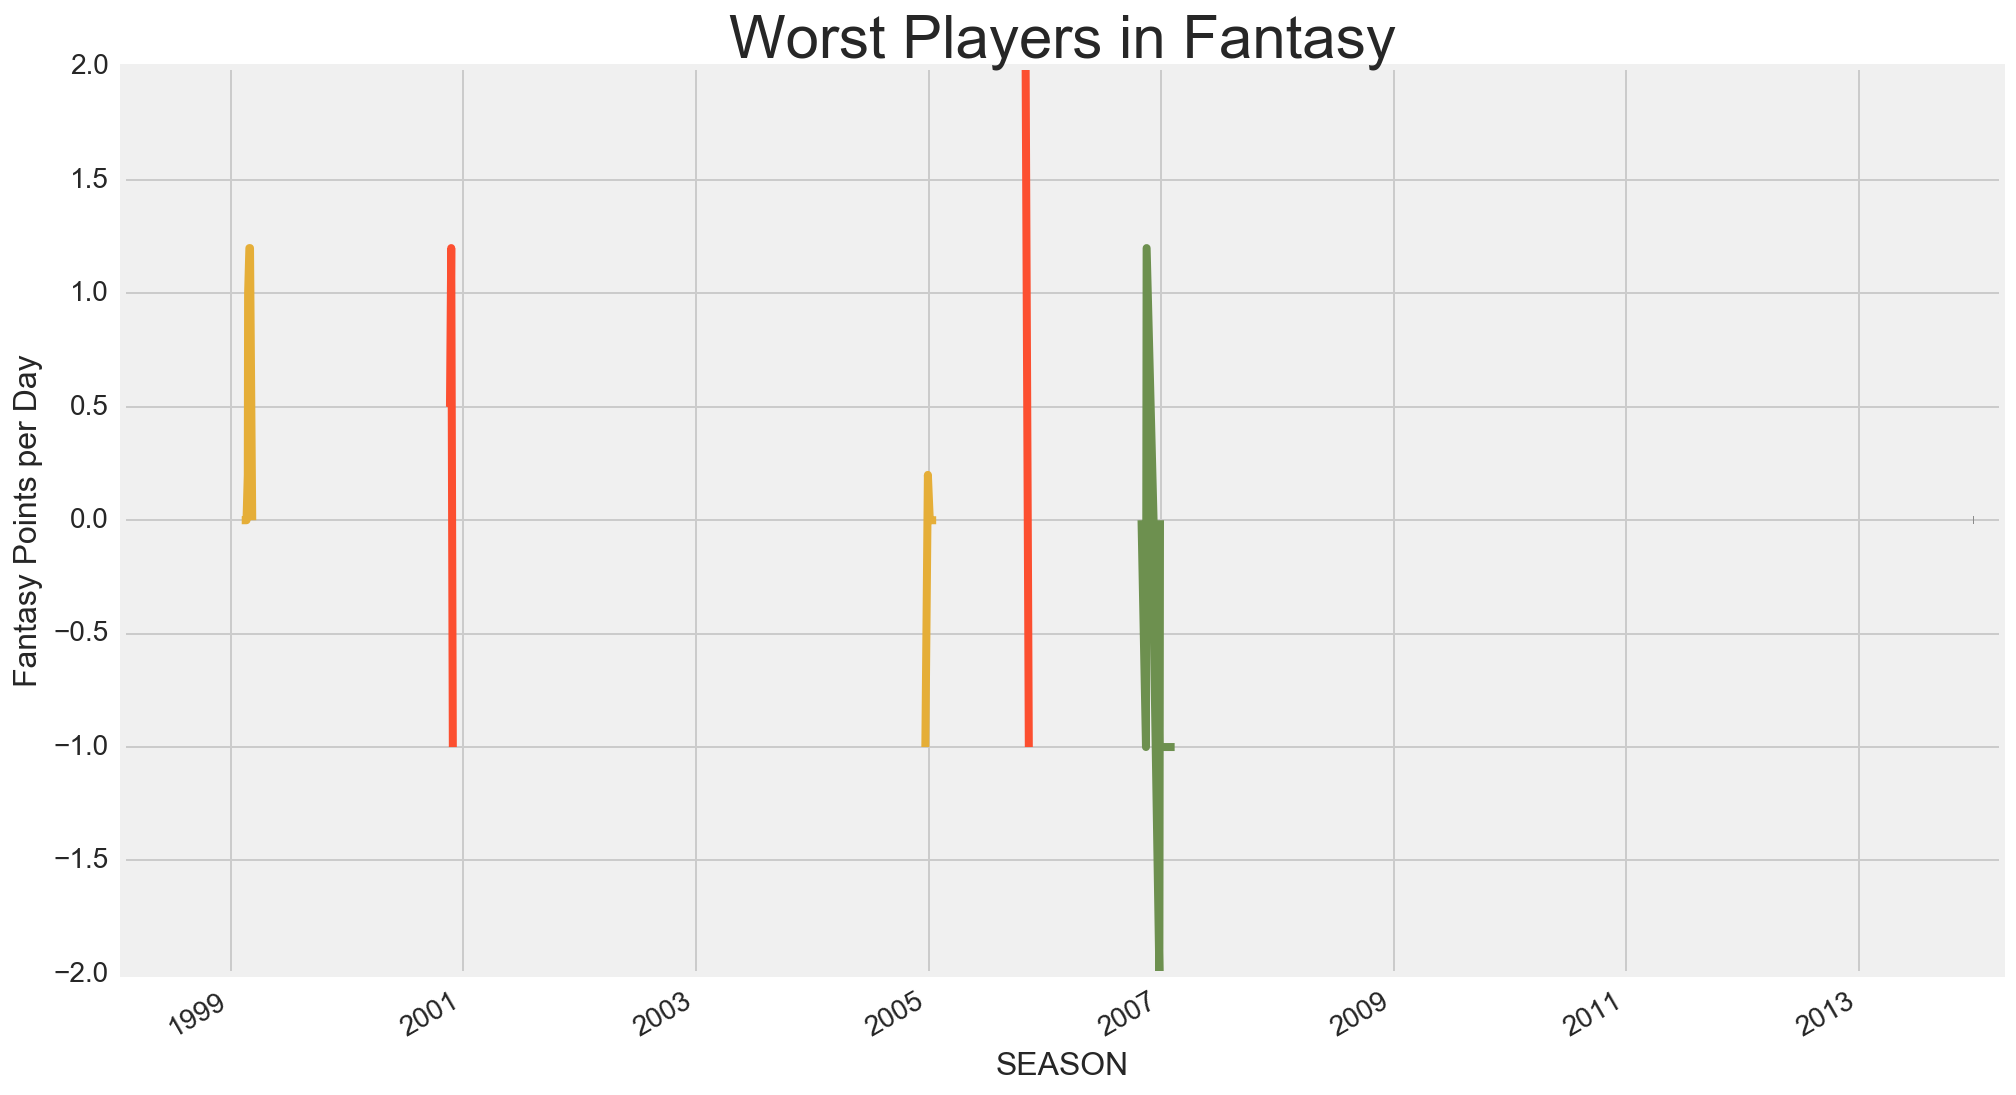

In [16]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
for player in first_percentile_players:
    df_gamelogs[(df_gamelogs.PLAYER_NAME == player)]['FP'].rolling(window=1).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=player)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Day', size=16)
ax.set_title('Worst Players in Fantasy', size=30)
plt.show()

# ========================================================
# Based on the best FP players per position, which stats are most correlated
# ========================================================

In [17]:
df_bios = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/all_bios.csv')
df_gamelogs_2 = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/gamelogs_clean_withFP.csv')

In [18]:
df_bios_subset = df_bios[['PLAYER_ID', 'COUNTRY', 'DRAFT_ROUND', 'SEASON']]

In [19]:
df_gamelogs_2.columns

Index([u'Unnamed: 0', u'PLAYER_ID', u'PLAYER_NAME', u'TEAM_NAME', u'GAME_ID',
       u'GAME_DATE', u'MATCHUP', u'WL', u'MIN', u'FGM', u'FGA', u'FG3M',
       u'FG3A', u'FTM', u'FTA', u'OREB', u'DREB', u'REB', u'AST', u'STL',
       u'BLK', u'TOV', u'PF', u'PTS', u'PLUS_MINUS', u'SEASON', u'FP'],
      dtype='object')

In [20]:
df_gamelogs_bios = df_gamelogs_2.merge(df_bios_subset, how='outer', on=['PLAYER_ID', 'SEASON'])

In [21]:
df_logs_gb = pd.DataFrame(df_gamelogs_bios.groupby(['PLAYER_NAME', 'COUNTRY', 'DRAFT_ROUND'])['FP'].mean().reset_index())

In [22]:
df_logs_gb.COUNTRY.value_counts()

USA                                 1538
France                                18
Canada                                18
Brazil                                12
Australia                              9
Croatia                                9
Russia                                 9
Lithuania                              8
Argentina                              8
Serbia                                 8
Spain                                  8
Slovenia                               7
Turkey                                 7
Ukraine                                6
Nigeria                                6
Senegal                                6
Germany                                5
Serbia and Montenegro                  5
Greece                                 4
Yugoslavia                             4
Georgia                                4
Dominican Republic                     4
Montenegro                             4
China                                  4
Puerto Rico     

In [23]:
df_logs_gb[(df_logs_gb.COUNTRY == 'USA') & (df_logs_gb.DRAFT_ROUND == '1')].sort_values('FP', ascending=False).head()

,PLAYER_NAME,COUNTRY,DRAFT_ROUND,FP
1061,LeBron James,USA,1,48.380344
986,Kevin Durant,USA,1,43.442434
300,Chris Webber,USA,1,42.325948
46,Allen Iverson,USA,1,42.055033
292,Chris Paul,USA,1,41.919146


In [24]:
df_logs_gb[(df_logs_gb.COUNTRY == 'USA') & (df_logs_gb.DRAFT_ROUND == '2')].sort_values('FP', ascending=False).head()

,PLAYER_NAME,COUNTRY,DRAFT_ROUND,FP
633,Gilbert Arenas,USA,2,34.780072
1243,Monta Ellis,USA,2,31.973650
233,Carlos Boozer,USA,2,31.471429
479,Dino Radja,USA,2,29.848000
674,Hassan Whiteside,USA,2,29.362143


In [25]:
df_logs_gb[(df_logs_gb.COUNTRY == 'USA') & (df_logs_gb.DRAFT_ROUND == 'Undrafted')].sort_values('FP', ascending=False).head()

,PLAYER_NAME,COUNTRY,DRAFT_ROUND,FP
174,Brad Miller,USA,Undrafted,25.418548
410,David Wesley,USA,Undrafted,25.230820
141,Ben Wallace,USA,Undrafted,24.763235
1418,Robert Covington,USA,Undrafted,24.003472
1739,Wesley Matthews,USA,Undrafted,23.157225


In [26]:
df_logs_gb[(df_logs_gb.COUNTRY != 'USA') & (df_logs_gb.COUNTRY != 'U.S. Virgin Islands') & (df_logs_gb.DRAFT_ROUND == '1')].sort_values('FP', ascending=False).head(6)

,PLAYER_NAME,COUNTRY,DRAFT_ROUND,FP
483,Dirk Nowitzki,Germany,1,37.576493
1324,Pau Gasol,Spain,1,36.737536
1029,Kyrie Irving,Australia,1,34.632686
1760,Yao Ming,China,1,34.364815
663,Hakeem Olajuwon,Nigeria,1,31.945266
23,Al Horford,Dominican Republic,1,31.733218


In [27]:
df_logs_gb[(df_logs_gb.COUNTRY != 'USA') & (df_logs_gb.COUNTRY != 'U.S. Virgin Islands') & (df_logs_gb.DRAFT_ROUND == '2')].sort_values('FP', ascending=False).head()

,PLAYER_NAME,COUNTRY,DRAFT_ROUND,FP
1116,Marc Gasol,Spain,2,31.214763
1114,Manu Ginobili,Argentina,2,26.407476
1187,Mehmet Okur,Turkey,2,25.849685
640,Goran Dragic,Slovenia,2,23.628223
1119,Marcin Gortat,Poland,2,23.536639


In [28]:
df_logs_gb[(df_logs_gb.COUNTRY != 'USA') & (df_logs_gb.COUNTRY != 'U.S. Virgin Islands') & (df_logs_gb.DRAFT_ROUND == 'Undrafted')].sort_values('FP', ascending=False).head()

,PLAYER_NAME,COUNTRY,DRAFT_ROUND,FP
1279,Nikola Jokic,Serbia,Undrafted,23.993750
907,Jose Calderon,Spain,Undrafted,23.559492
963,Kelenna Azubuike,England,Undrafted,18.681731
72,Andres Nocioni,Argentina,Undrafted,18.571012
908,Jose Juan Barea,Puerto Rico,Undrafted,15.970455


In [29]:
df_gamelogs_bios.GAME_DATE = pd.to_datetime(df_gamelogs_bios.GAME_DATE)
df_gamelogs_bios.set_index('GAME_DATE', inplace=True)

In [30]:
df_gamelogs_bios[df_gamelogs_bios.COUNTRY == 'USA'].sort_values('FP', ascending=False)

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_NAME,GAME_ID,MATCHUP,WL,MIN,FGM,FGA,...,STL,BLK,TOV,PF,PTS,PLUS_MINUS,SEASON,FP,COUNTRY,DRAFT_ROUND
GAME_DATE,,,,,,,,,,,,,,,,,,,,,
2006-01-22,261603.0,977.0,Kobe Bryant,Los Angeles Lakers,20500591.0,LAL vs. TOR,W,42.0,28.0,46.0,...,3.0,1.0,3.0,1.0,81.0,25.0,2005-06,99.7,USA,1
2001-01-05,384779.0,185.0,Chris Webber,Sacramento Kings,20000471.0,SAC vs. IND,L,50.0,24.0,47.0,...,3.0,2.0,4.0,4.0,51.0,-1.0,2000-01,95.7,USA,1
2010-02-18,157959.0,2544.0,LeBron James,Cleveland Cavaliers,20900802.0,CLE vs. DEN,L,47.0,15.0,33.0,...,2.0,4.0,3.0,1.0,43.0,-5.0,2009-10,90.6,USA,1
2016-02-21,8366.0,203076.0,Anthony Davis,New Orleans Pelicans,21500823.0,NOP @ DET,W,43.0,24.0,34.0,...,0.0,1.0,2.0,1.0,59.0,17.0,2015-16,90.0,USA,1
2000-03-06,401146.0,406.0,Shaquille O'Neal,Los Angeles Lakers,29900856.0,LAL @ LAC,W,45.0,24.0,35.0,...,0.0,0.0,4.0,2.0,61.0,16.0,1999-00,89.1,USA,1
2007-04-07,225492.0,1713.0,Vince Carter,New Jersey Nets,20601136.0,NJN vs. WAS,W,47.0,16.0,28.0,...,1.0,3.0,5.0,2.0,46.0,12.0,2006-07,86.7,USA,1
2015-03-04,32885.0,201566.0,Russell Westbrook,Oklahoma City Thunder,21400904.0,OKC vs. PHI,W,42.0,16.0,33.0,...,3.0,1.0,4.0,3.0,49.0,-12.0,2014-15,86.5,USA,1
2012-01-12,120805.0,2730.0,Dwight Howard,Orlando Magic,21100158.0,ORL @ GSW,W,44.0,12.0,21.0,...,4.0,2.0,3.0,2.0,45.0,12.0,2011-12,86.1,USA,1
2007-03-16,228812.0,977.0,Kobe Bryant,Los Angeles Lakers,20600977.0,LAL vs. POR,W,50.0,23.0,39.0,...,3.0,0.0,2.0,3.0,65.0,4.0,2006-07,85.9,USA,1


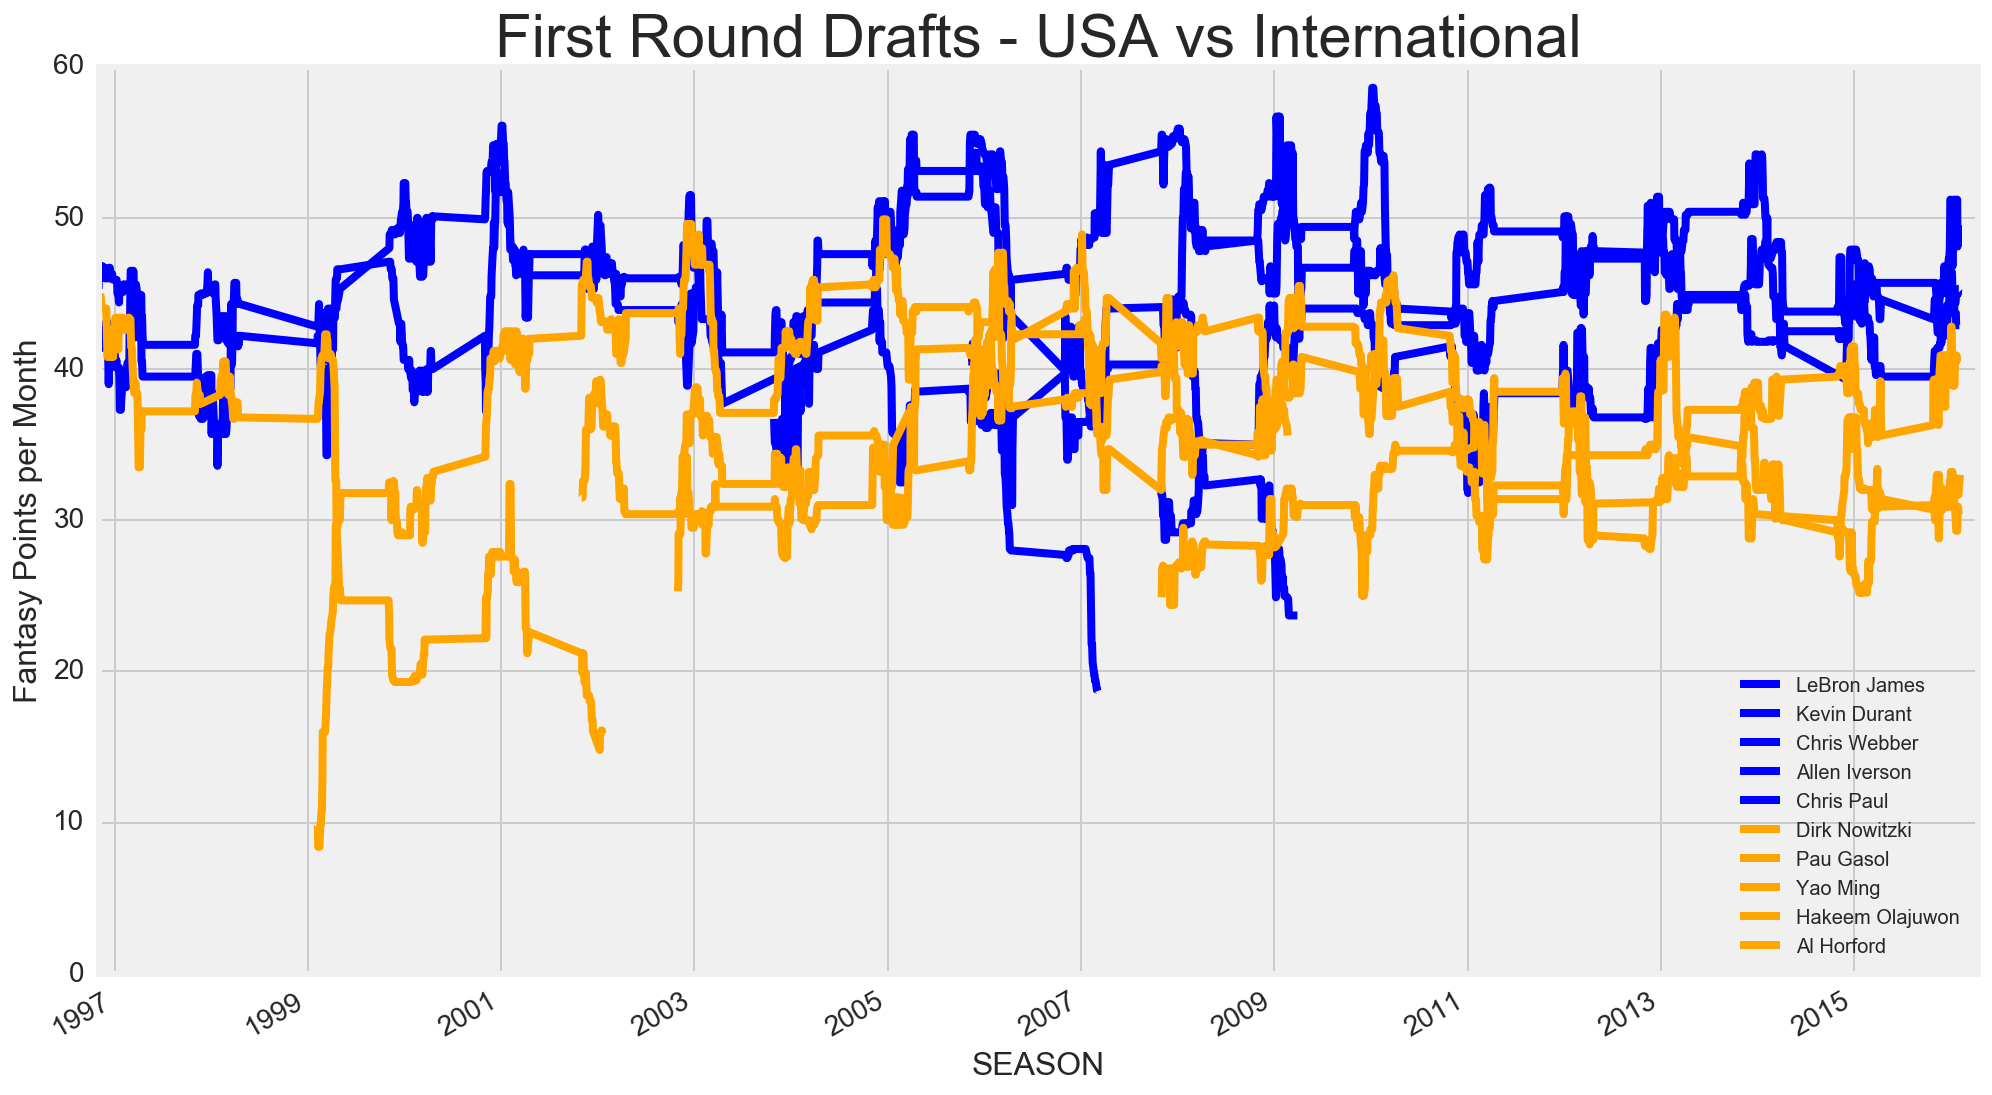

In [31]:
# USA vs International - 1st Round Draftee
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "LeBron James"
Player2 = 'Kevin Durant'
Player3 = 'Chris Webber'
Player4 = 'Allen Iverson'
Player5 = 'Chris Paul'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player5)

Player6 = "Dirk Nowitzki"
Player7 = 'Pau Gasol'
Player8 = 'Yao Ming'
Player9 = 'Hakeem Olajuwon'
Player10 = 'Al Horford'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player6)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player6)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player7)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player7)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player8)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player8)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player9)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player9)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player10)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player10)


ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('First Round Drafts - USA vs International', size=30)
plt.legend(loc='lower right')
plt.show()

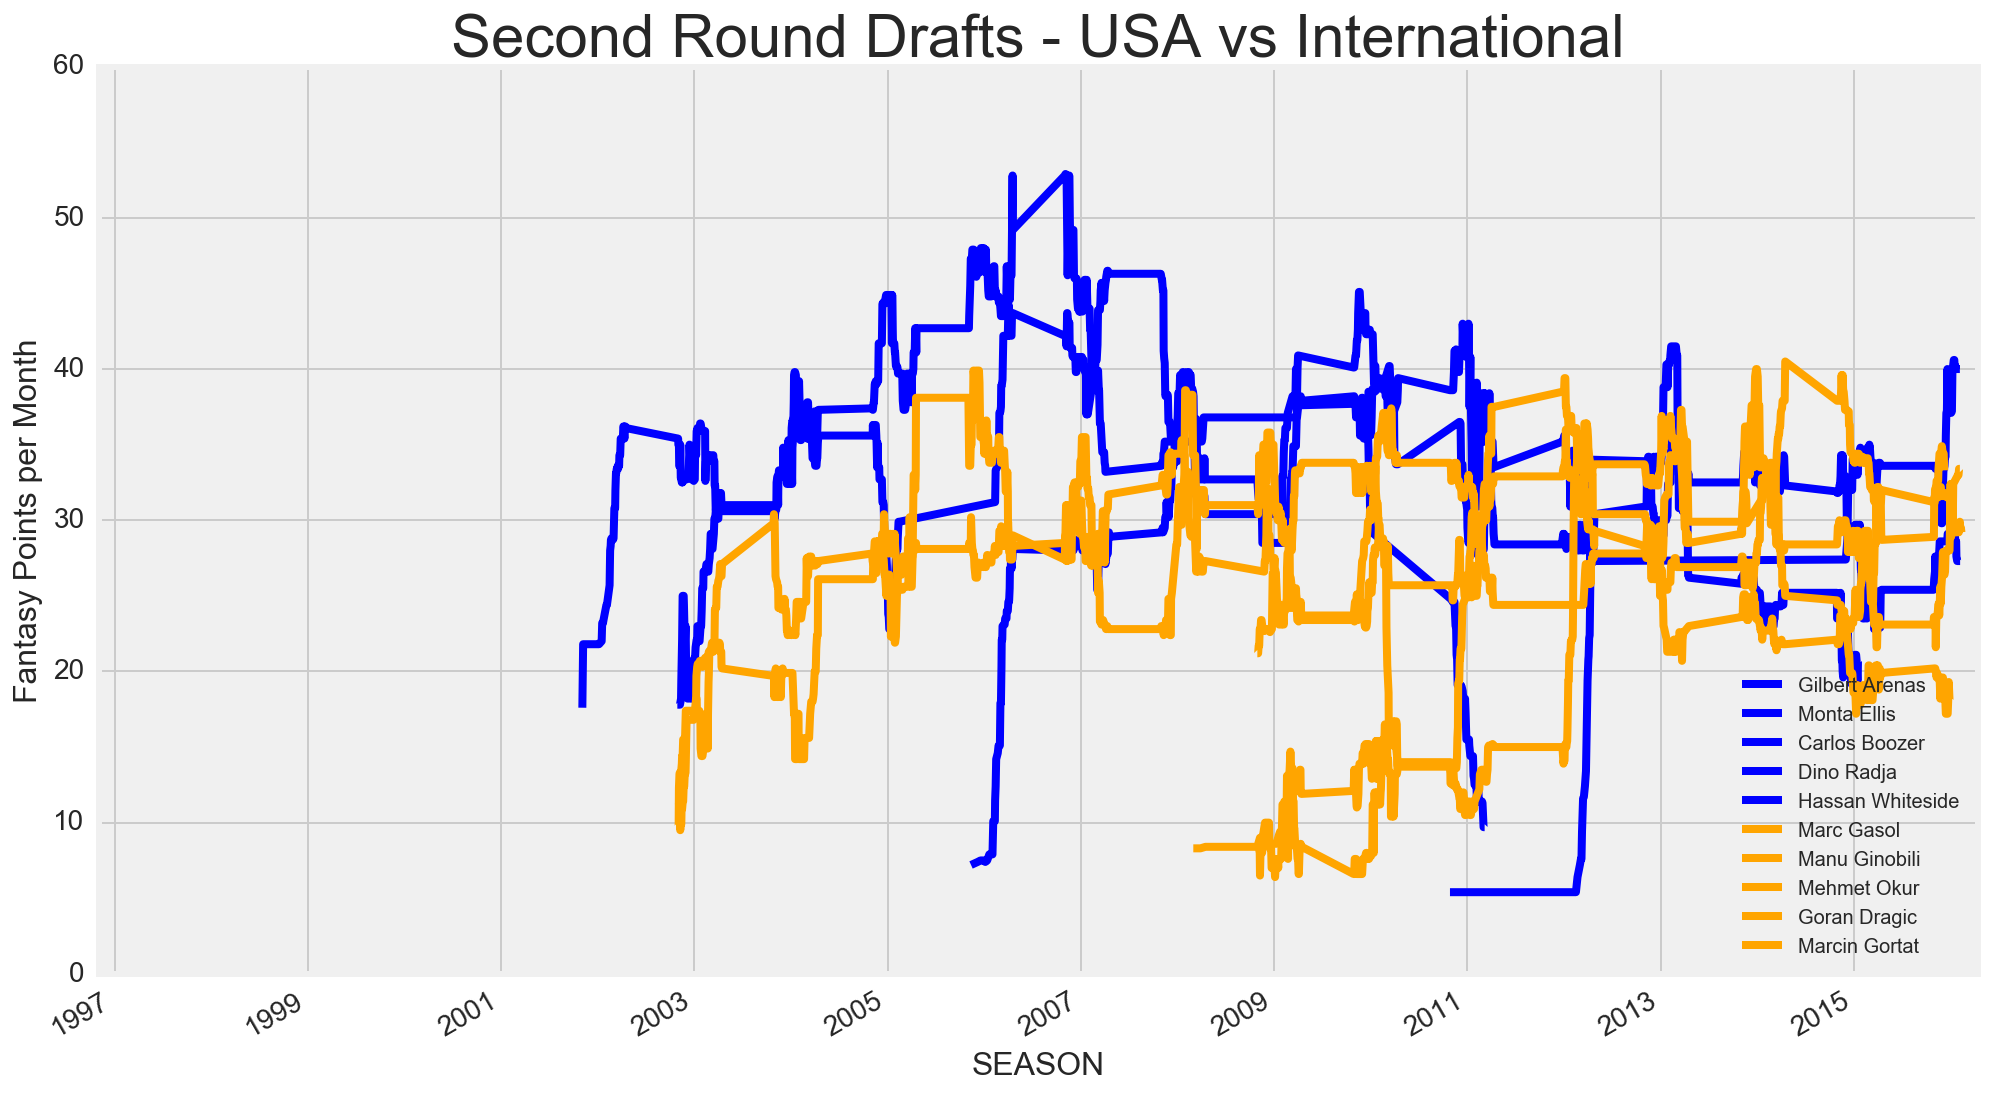

In [32]:
# USA vs International - 2nd Round Draftee
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Gilbert Arenas"
Player2 = 'Monta Ellis'
Player3 = 'Carlos Boozer'
Player4 = 'Dino Radja'
Player5 = 'Hassan Whiteside'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player5)

Player6 = "Marc Gasol"
Player7 = 'Manu Ginobili'
Player8 = 'Mehmet Okur'
Player9 = 'Goran Dragic'
Player10 = 'Marcin Gortat'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player6)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player6)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player7)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player7)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player8)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player8)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player9)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player9)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player10)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player10)


ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Second Round Drafts - USA vs International', size=30)
plt.legend(loc='lower right')
plt.show()

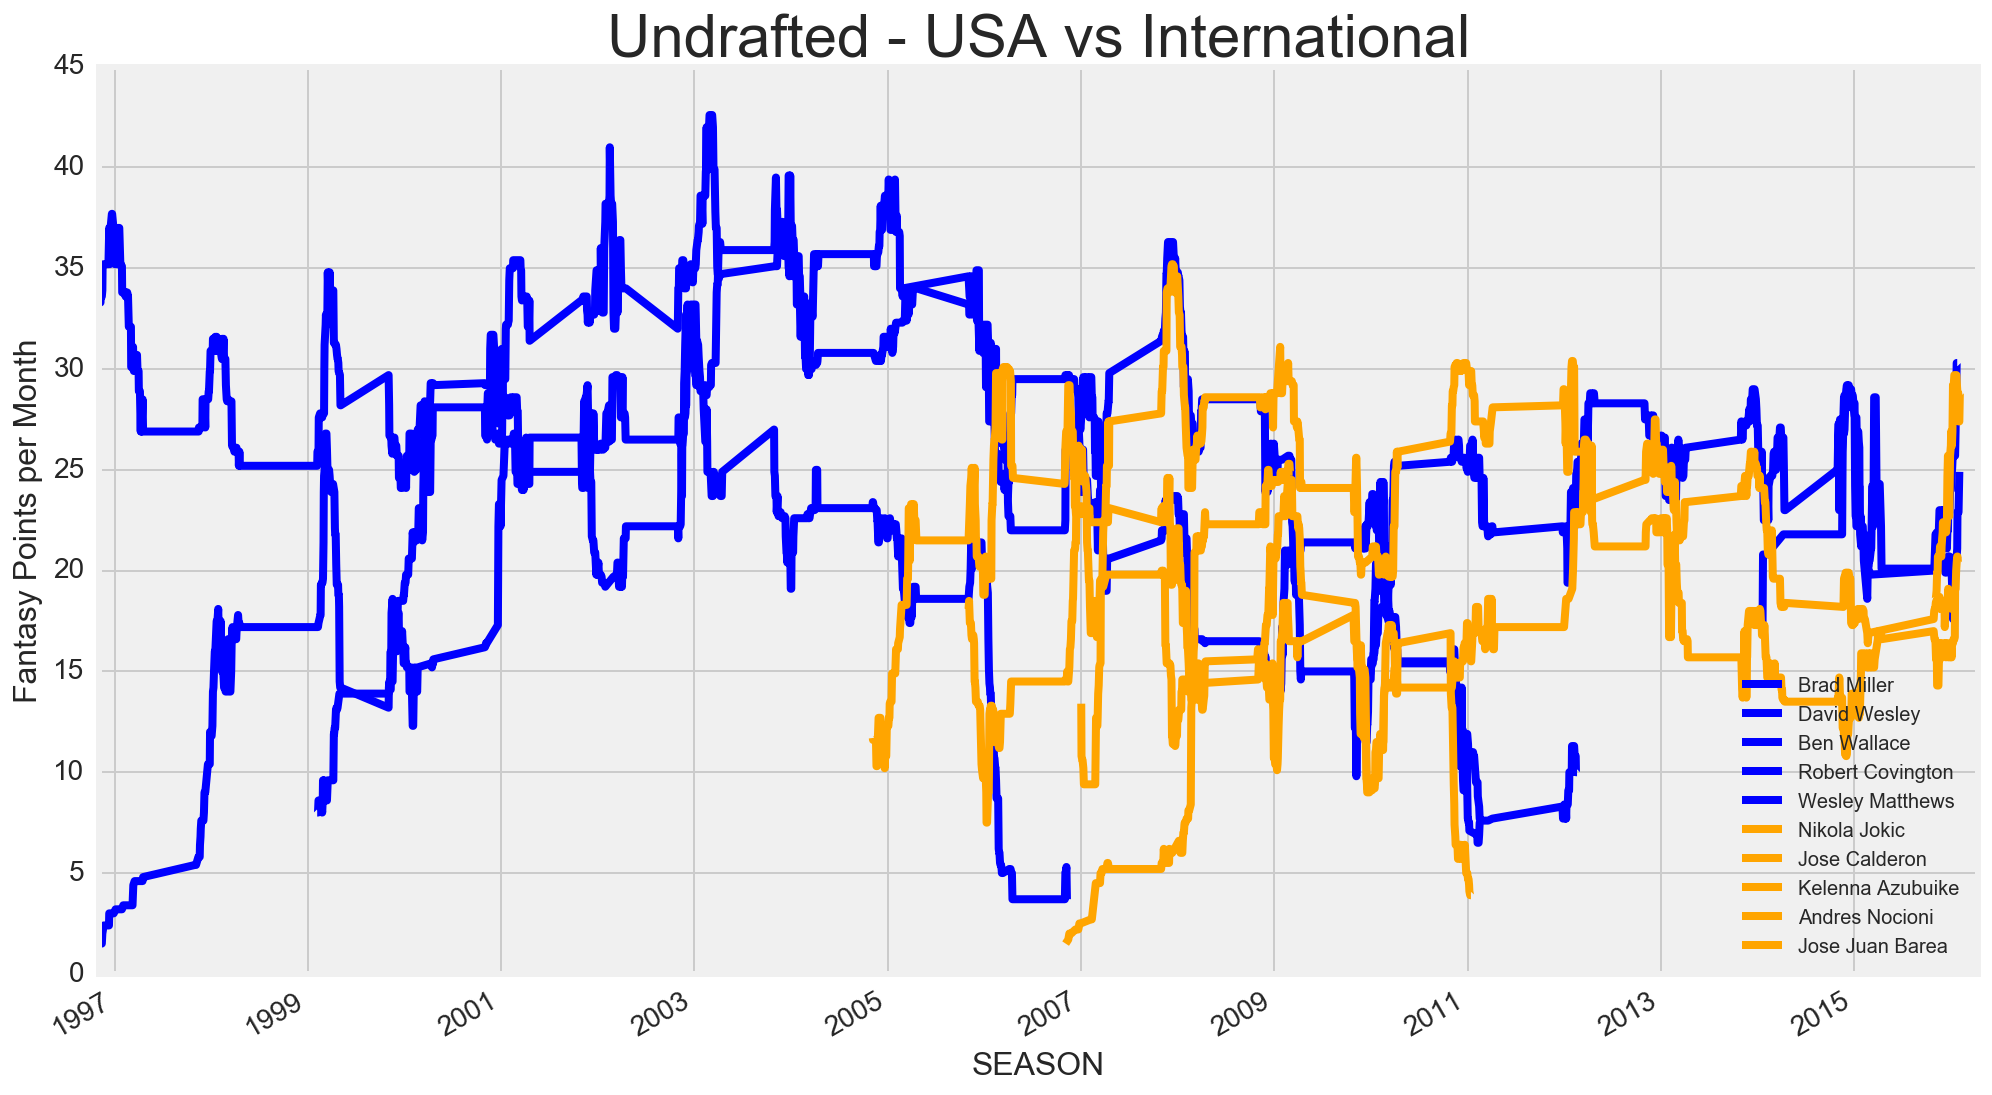

In [33]:
# USA vs International - Undrafted
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Brad Miller"
Player2 = 'David Wesley'
Player3 = 'Ben Wallace'
Player4 = 'Robert Covington'
Player5 = 'Wesley Matthews'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player5)

Player6 = "Nikola Jokic"
Player7 = 'Jose Calderon'
Player8 = 'Kelenna Azubuike'
Player9 = 'Andres Nocioni'
Player10 = 'Jose Juan Barea'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player6)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player6)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player7)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player7)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player8)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player8)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player9)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player9)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player10)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player10)


ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Undrafted - USA vs International', size=30)
plt.legend(loc='lower right')
plt.show()

In [34]:
# Creating top 30 positions
fantasy_pos = ['F', 'F', 'F', 'G', 'G', 'F', 'C', 'G', 'F', 'G', 
               'G', 'G', 'F', 
               'G', 'F', 'F', 
               'C', 'F', 'C', 
               'G', 'F',
              'F', 'F', 'C' ,'C', 'G', 'G', 'G', 'G', 'G']

In [35]:
len(fantasy_pos)

30

In [36]:
df_logs_gb_sort_1 = df_logs_gb.sort_values('FP', ascending=False).head(30)

In [37]:
df_logs_gb_sort_1.shape

(30, 4)

In [38]:
df_logs_gb_sort_1['pos'] = fantasy_pos

In [39]:
df_logs_gb_sort_1.sort_values(['pos','FP'],ascending=False)

,PLAYER_NAME,COUNTRY,DRAFT_ROUND,FP,pos
46,Allen Iverson,USA,1,42.055033,G
292,Chris Paul,USA,1,41.919146,G
1204,Michael Jordan,USA,1,40.921895,G
1462,Russell Westbrook,USA,1,40.314310,G
1561,Stephen Curry,USA,1,40.312727,G
522,Dwyane Wade,USA,1,40.052865,G
1012,Kobe Bryant,USA,1,39.843908,G
884,John Wall,USA,1,38.156872,G
355,Damian Lillard,USA,1,36.232087,G
316,Clyde Drexler,USA,1,36.221970,G


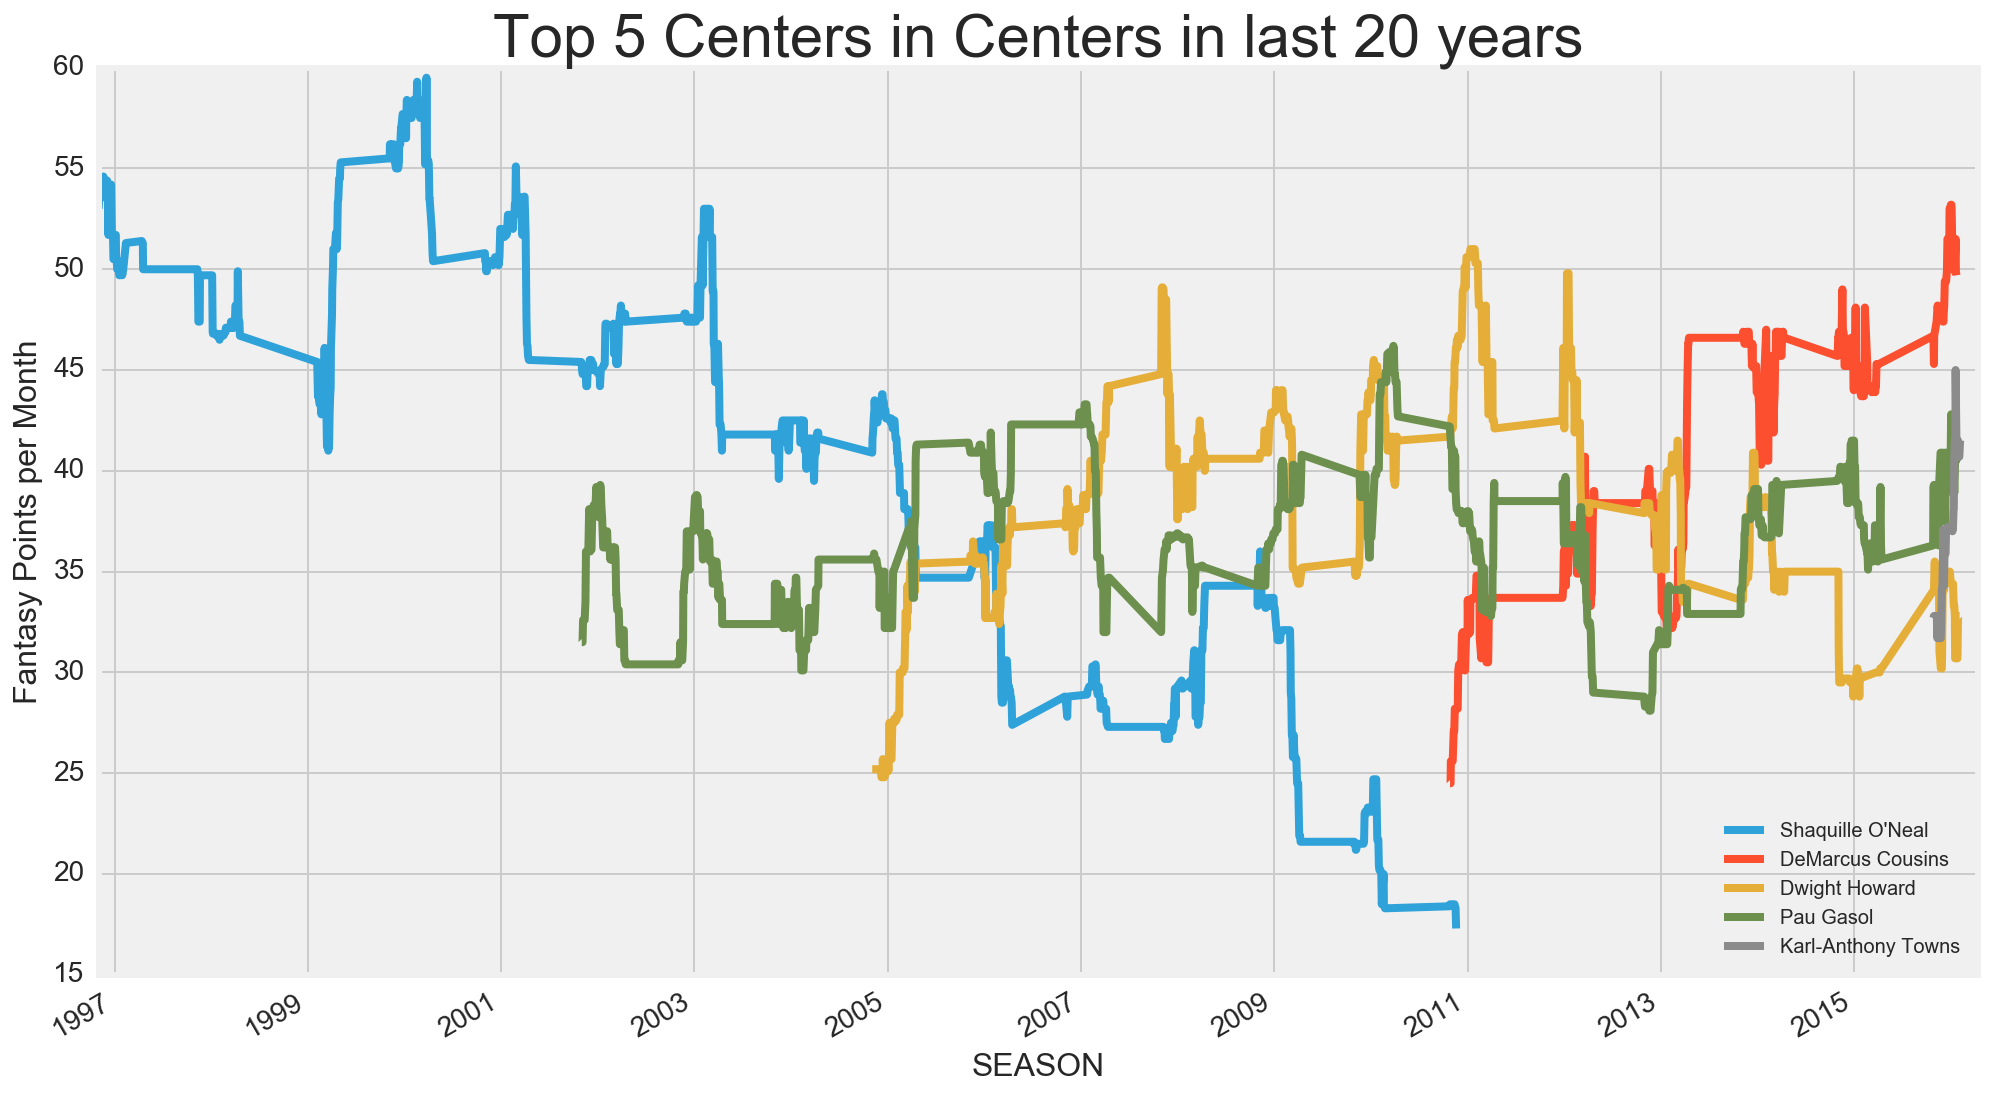

In [40]:
# Top 5 Centers in last 20 years
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Shaquille O'Neal"
Player2 = 'DeMarcus Cousins'
Player3 = 'Dwight Howard'
Player4 = 'Pau Gasol'
Player5 = 'Karl-Anthony Towns'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player5)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Top 5 Centers in Centers in last 20 years', size=30)
plt.legend(loc='lower right')
plt.show()

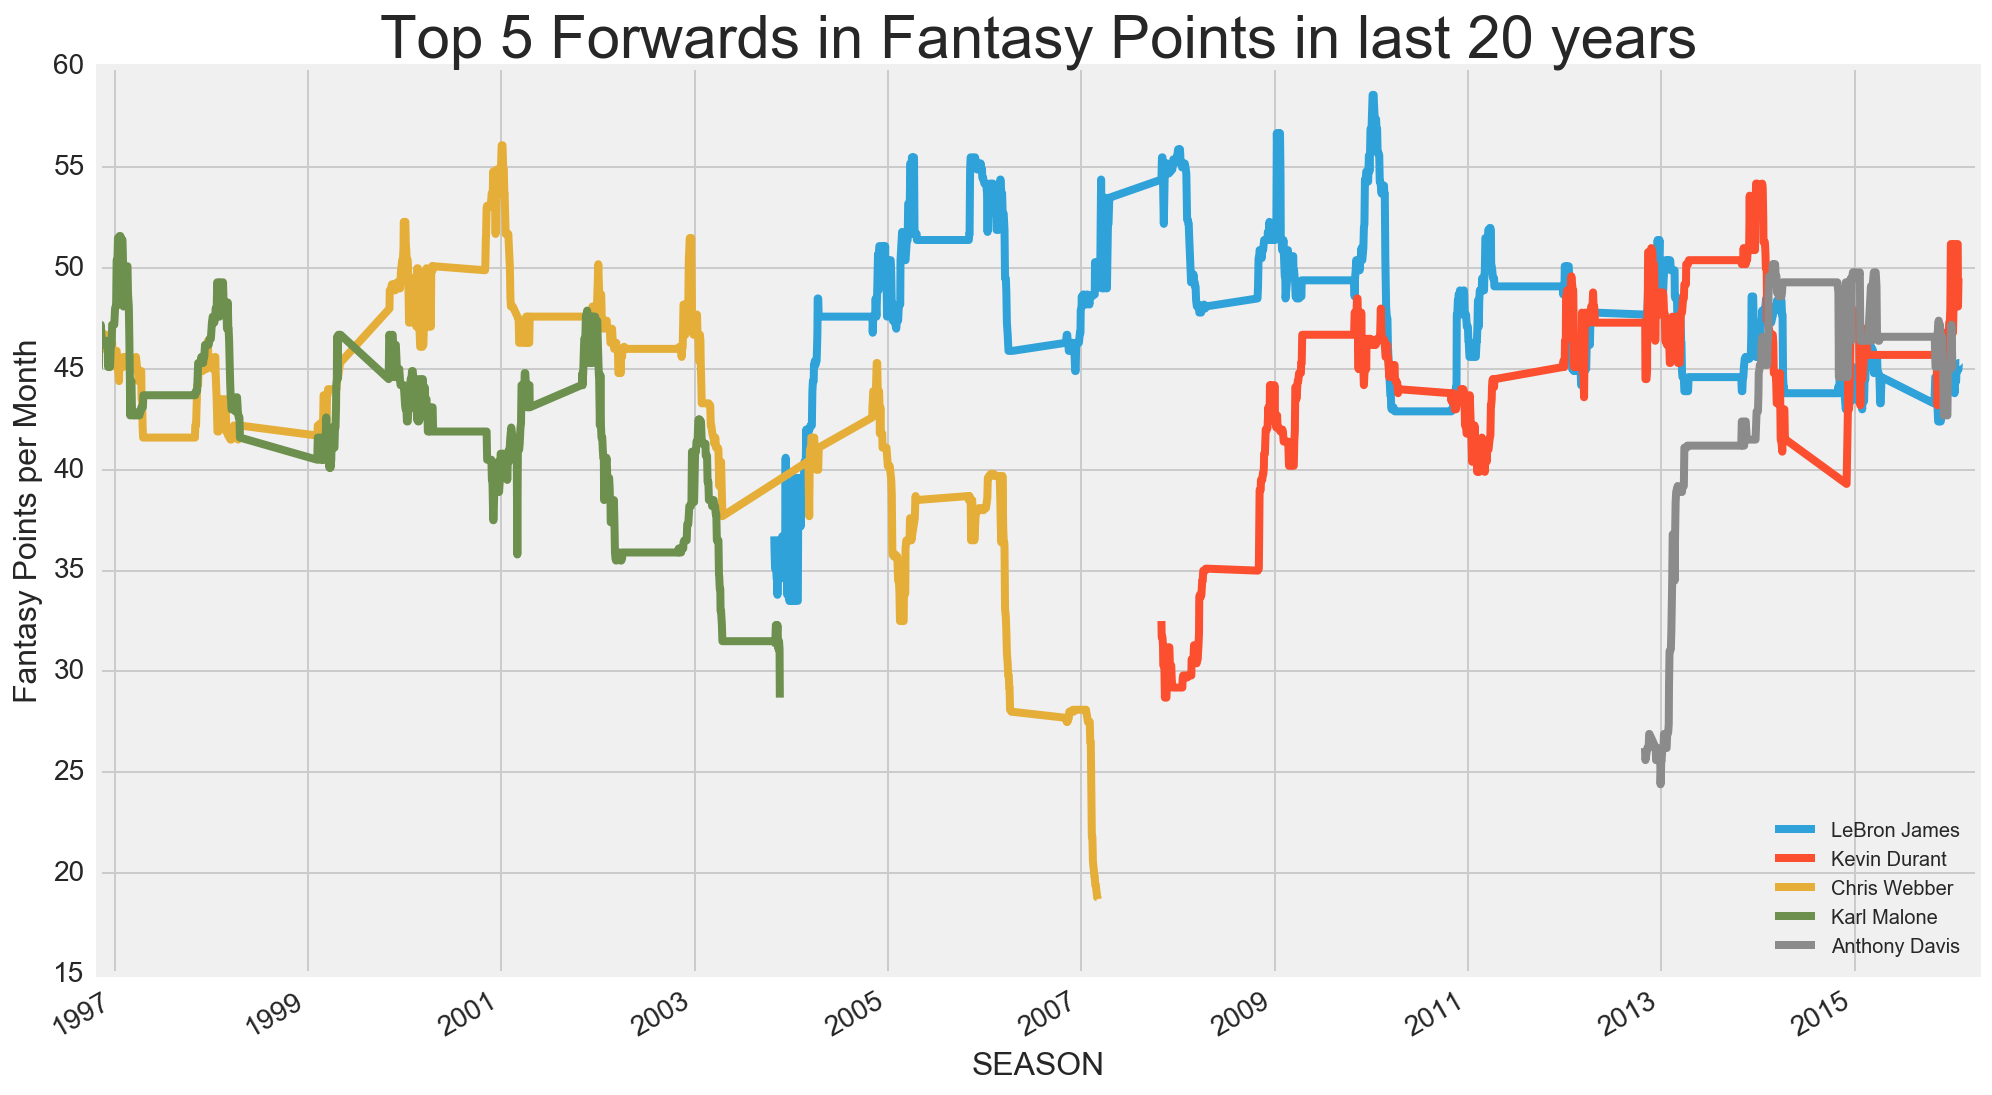

In [41]:
# Top 5 Forwards in last 20 years
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "LeBron James"
Player2 = 'Kevin Durant'
Player3 = 'Chris Webber'
Player4 = 'Karl Malone'
Player5 = 'Anthony Davis'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player5)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Top 5 Forwards in Fantasy Points in last 20 years', size=30)
plt.legend(loc='lower right')
plt.show()

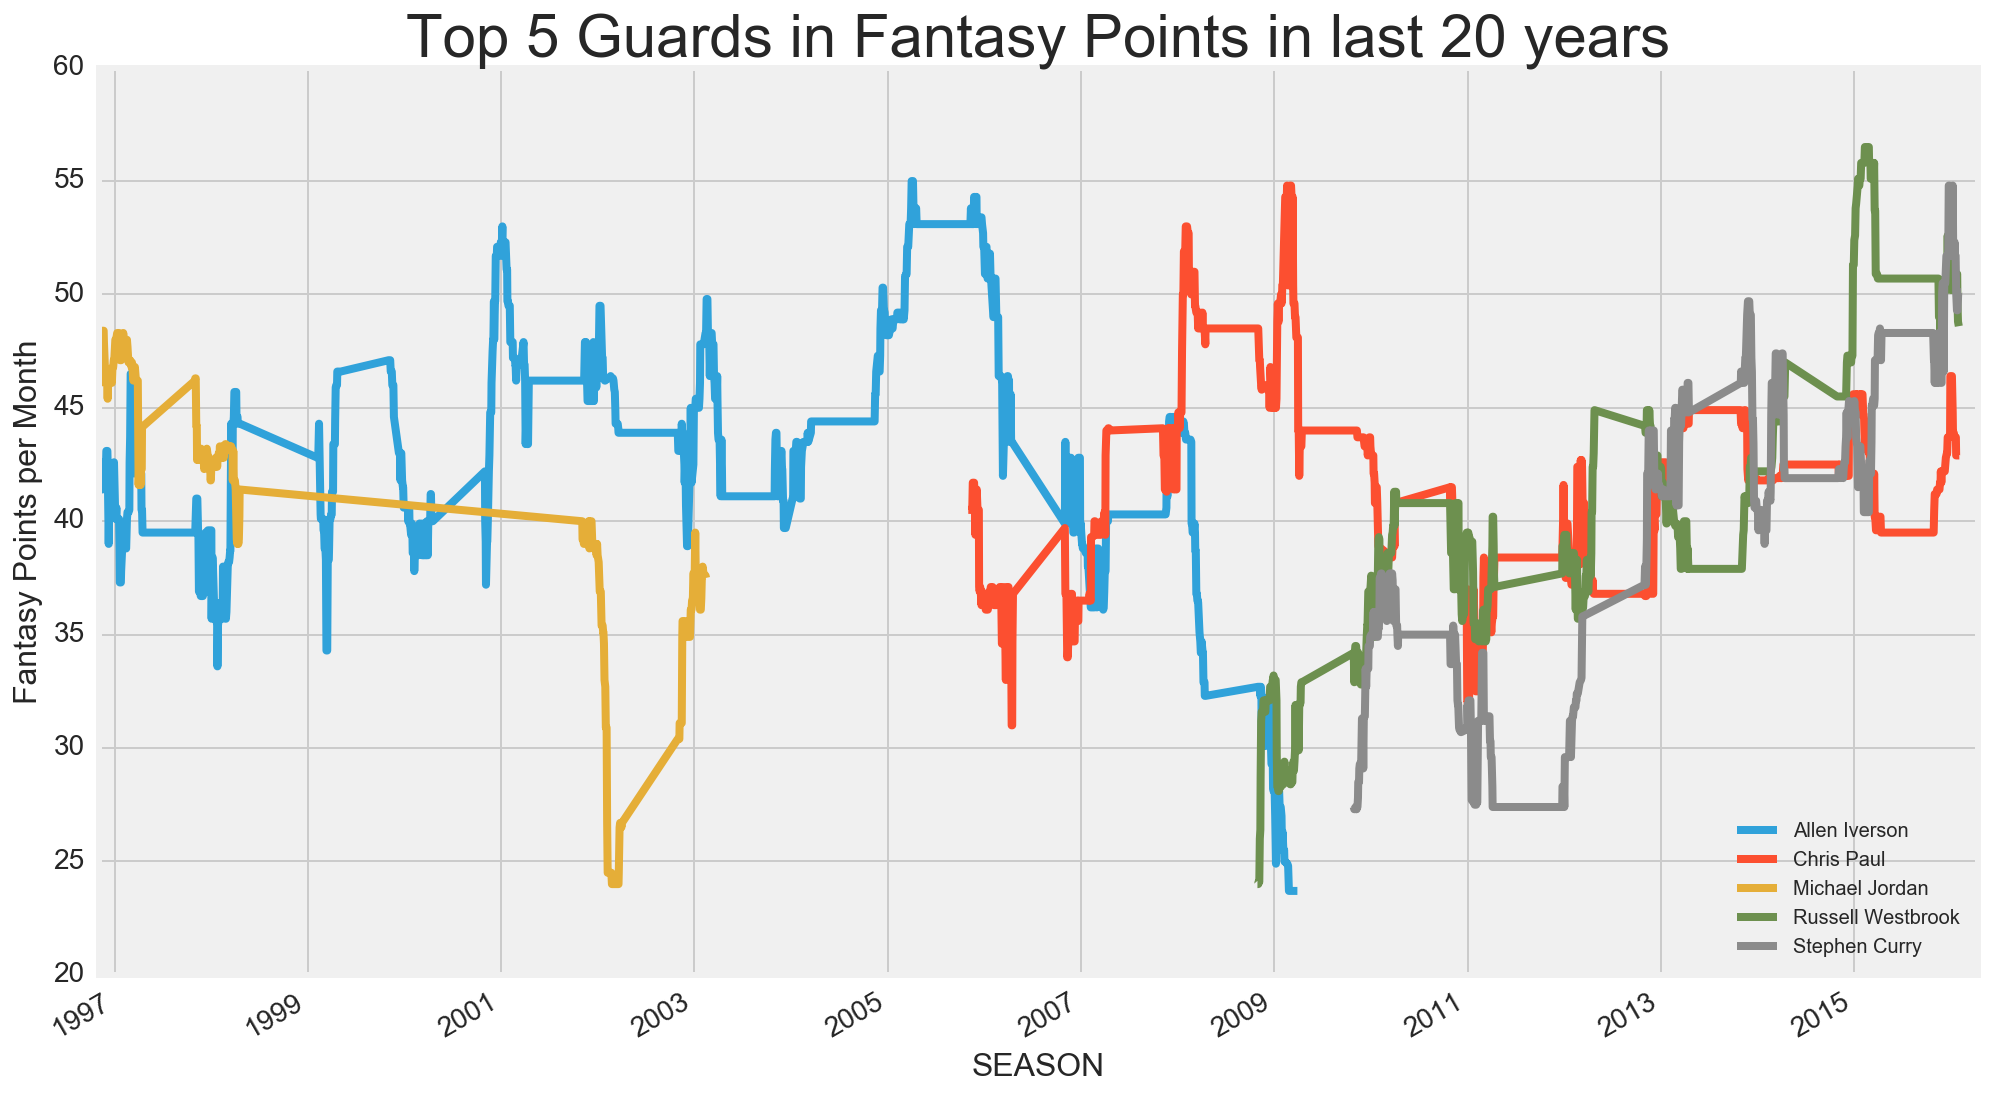

In [42]:
# Top 5 Centers in last 20 years
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Allen Iverson"
Player2 = 'Chris Paul'
Player3 = 'Michael Jordan'
Player4 = 'Russell Westbrook'
Player5 = 'Stephen Curry'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player5)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Top 5 Guards in Fantasy Points in last 20 years', size=30)
plt.legend(loc='lower right')
plt.show()

In [43]:
df_logs_gb_2 = pd.DataFrame(df_gamelogs_bios.groupby(['PLAYER_NAME', 'COUNTRY', 'DRAFT_ROUND','SEASON'])['FP'].mean().reset_index())

In [44]:
df_logs_gb_2[df_logs_gb_2.SEASON == '2015-16'].sort_values('FP', ascending=False).head(10)

,PLAYER_NAME,COUNTRY,DRAFT_ROUND,SEASON,FP
7955,Stephen Curry,USA,1,2015-16,50.487342
7459,Russell Westbrook,USA,1,2015-16,49.433750
3821,James Harden,USA,1,2015-16,49.014634
2247,DeMarcus Cousins,USA,1,2015-16,48.267692
4979,Kevin Durant,USA,1,2015-16,47.615278
5380,LeBron James,USA,1,2015-16,45.651316
497,Anthony Davis,USA,1,2015-16,44.424590
4523,John Wall,USA,1,2015-16,43.075325
1619,Chris Paul,USA,1,2015-16,42.189189
1909,Damian Lillard,USA,1,2015-16,40.905333


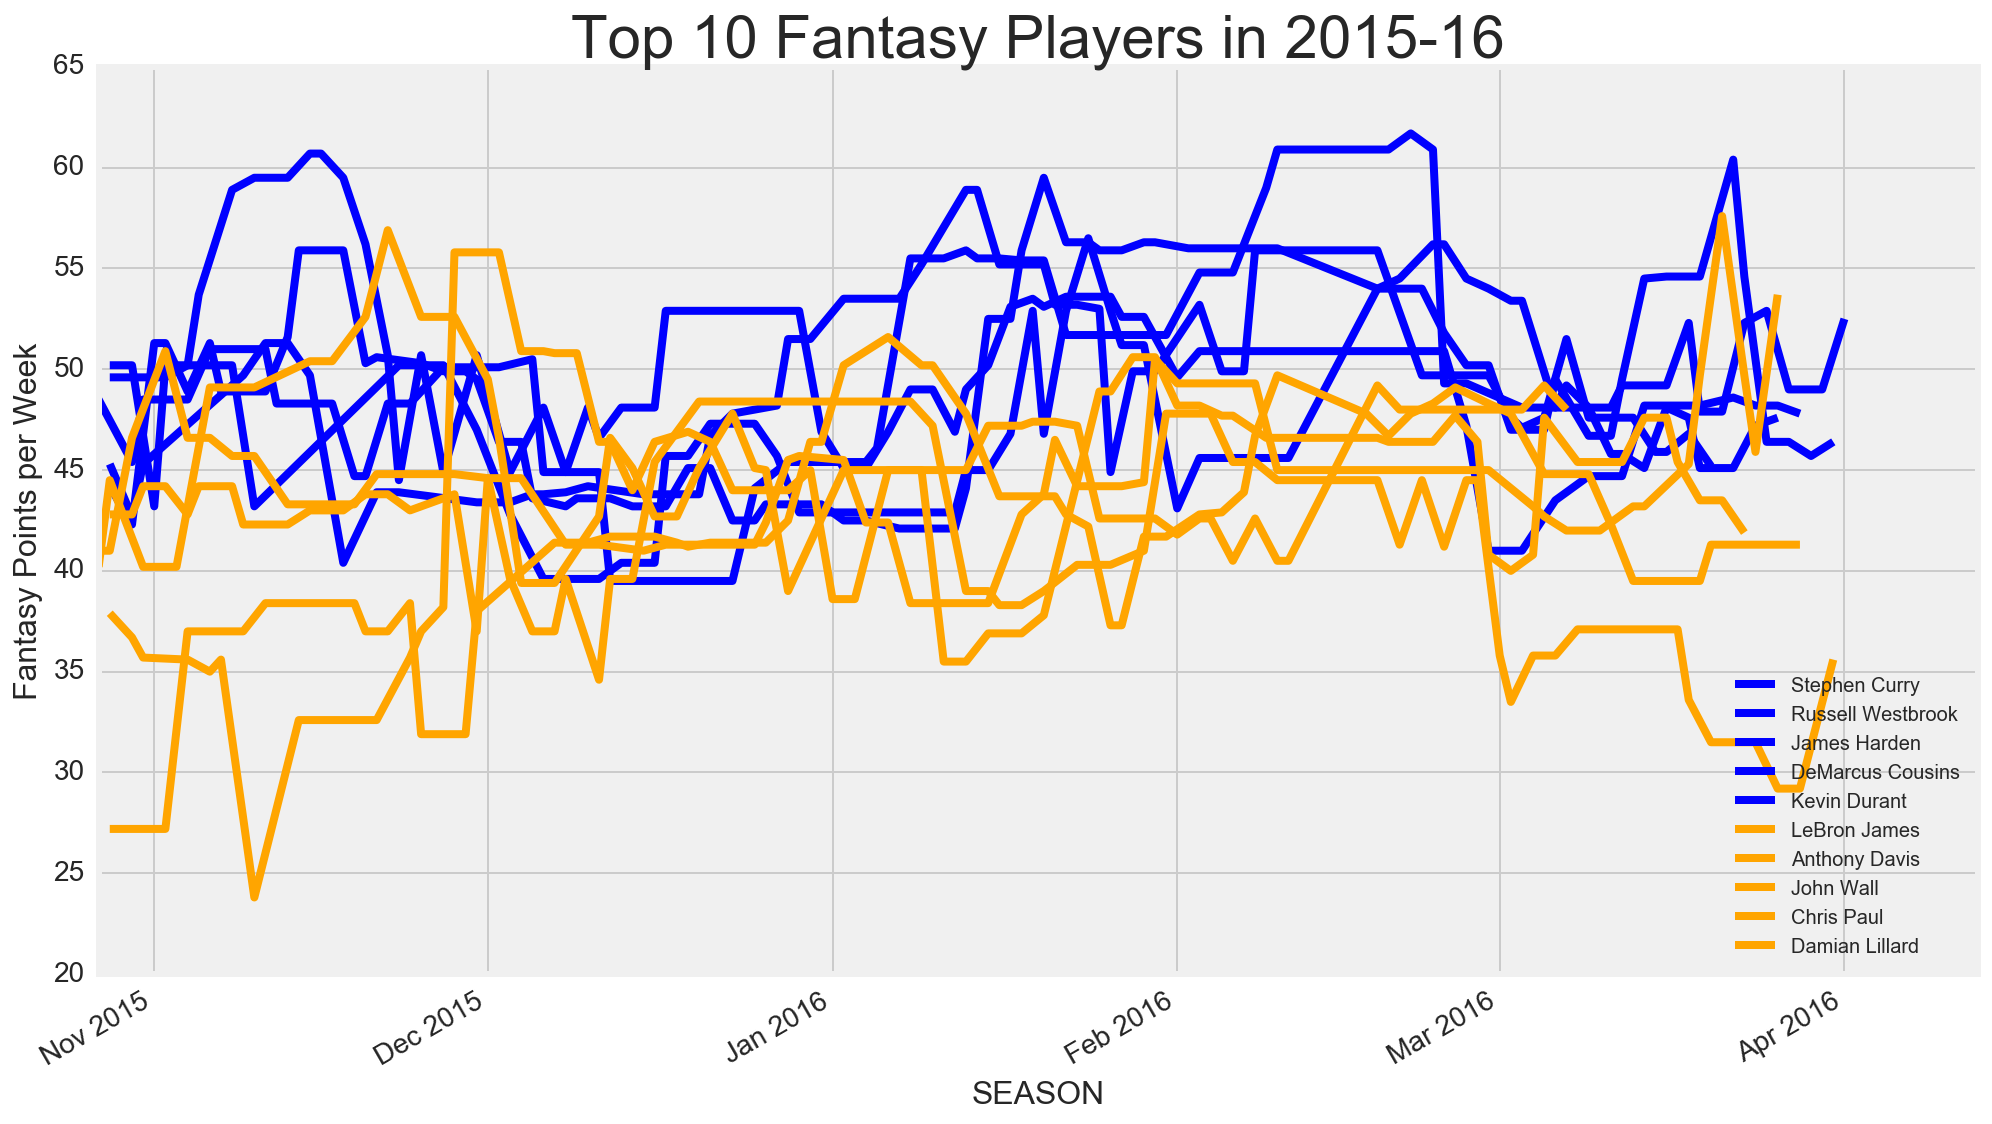

In [45]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Stephen Curry"
Player2 = 'Russell Westbrook'
Player3 = 'James Harden'
Player4 = 'DeMarcus Cousins'
Player5 = 'Kevin Durant'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player5)

Player6 = "LeBron James"
Player7 = 'Anthony Davis'
Player8 = 'John Wall'
Player9 = 'Chris Paul'
Player10 = 'Damian Lillard'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player6) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player6)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player7) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player7)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player8) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player8)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player9) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player9)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player10) & (df_gamelogs.SEASON == '2015-16')]['FP'].rolling(window=7).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player10)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Week', size=16)
ax.set_title('Top 10 Fantasy Players in 2015-16', size=30)
plt.legend(loc='lower right')
plt.show()

# ========================================================
# Target Variable Correlation and Comparison
# ========================================================

In [46]:
df_complete_target.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
df_complete_target.head()

,PLAYER_NAME,TEAM_ABBREVIATION,SEASON,AGE,agg_rank,clutch_agg_rank,fp_mean,fp_std,fp_var,game_risk
0,Kevin Durant,OKC,2013-14,25.0,179.127451,84.132530,57.686981,13.362933,178.567983,0.0
1,LeBron James,CLE,2009-10,25.0,165.401961,50.301205,56.657656,14.149642,200.212380,0.0
2,Kevin Garnett,MIN,2003-04,28.0,155.647059,85.421687,55.823503,11.762827,138.364104,0.0
3,Stephen Curry,GSW,2015-16,28.0,176.950980,70.759036,55.654200,15.887089,252.399603,0.0
4,Kevin Durant,OKC,2012-13,24.0,173.088235,88.156627,55.100449,10.625831,112.908289,0.0


In [48]:
df_complete_target.sort_values('agg_rank', ascending=True, inplace=True)
df_complete_target.sort_values('clutch_agg_rank', ascending=True, inplace=True)
df_complete_target['inv_agg_rank'] = 1 / df_complete_target['agg_rank']
df_complete_target['inv_clutch_agg_rank'] = 1 / df_complete_target['clutch_agg_rank']

In [49]:
# Drop all NaN values from player name, team abbreviation and age
df_complete_target.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)

In [50]:
inv_game = []
for game in df_complete_target['game_risk']:
    if game == 0:
        inv_game.append(3)
    elif game == 1:
        inv_game.append(2)
    elif game == 2:
        inv_game.append(1)
    elif game == 3:
        inv_game.append(0)

df_complete_target['inv_game_risk'] = inv_game

In [51]:
target_corr = df_complete_target[['AGE', 'inv_agg_rank', 'inv_clutch_agg_rank', 'fp_mean', 'fp_std', 'fp_var','inv_game_risk']].corr()

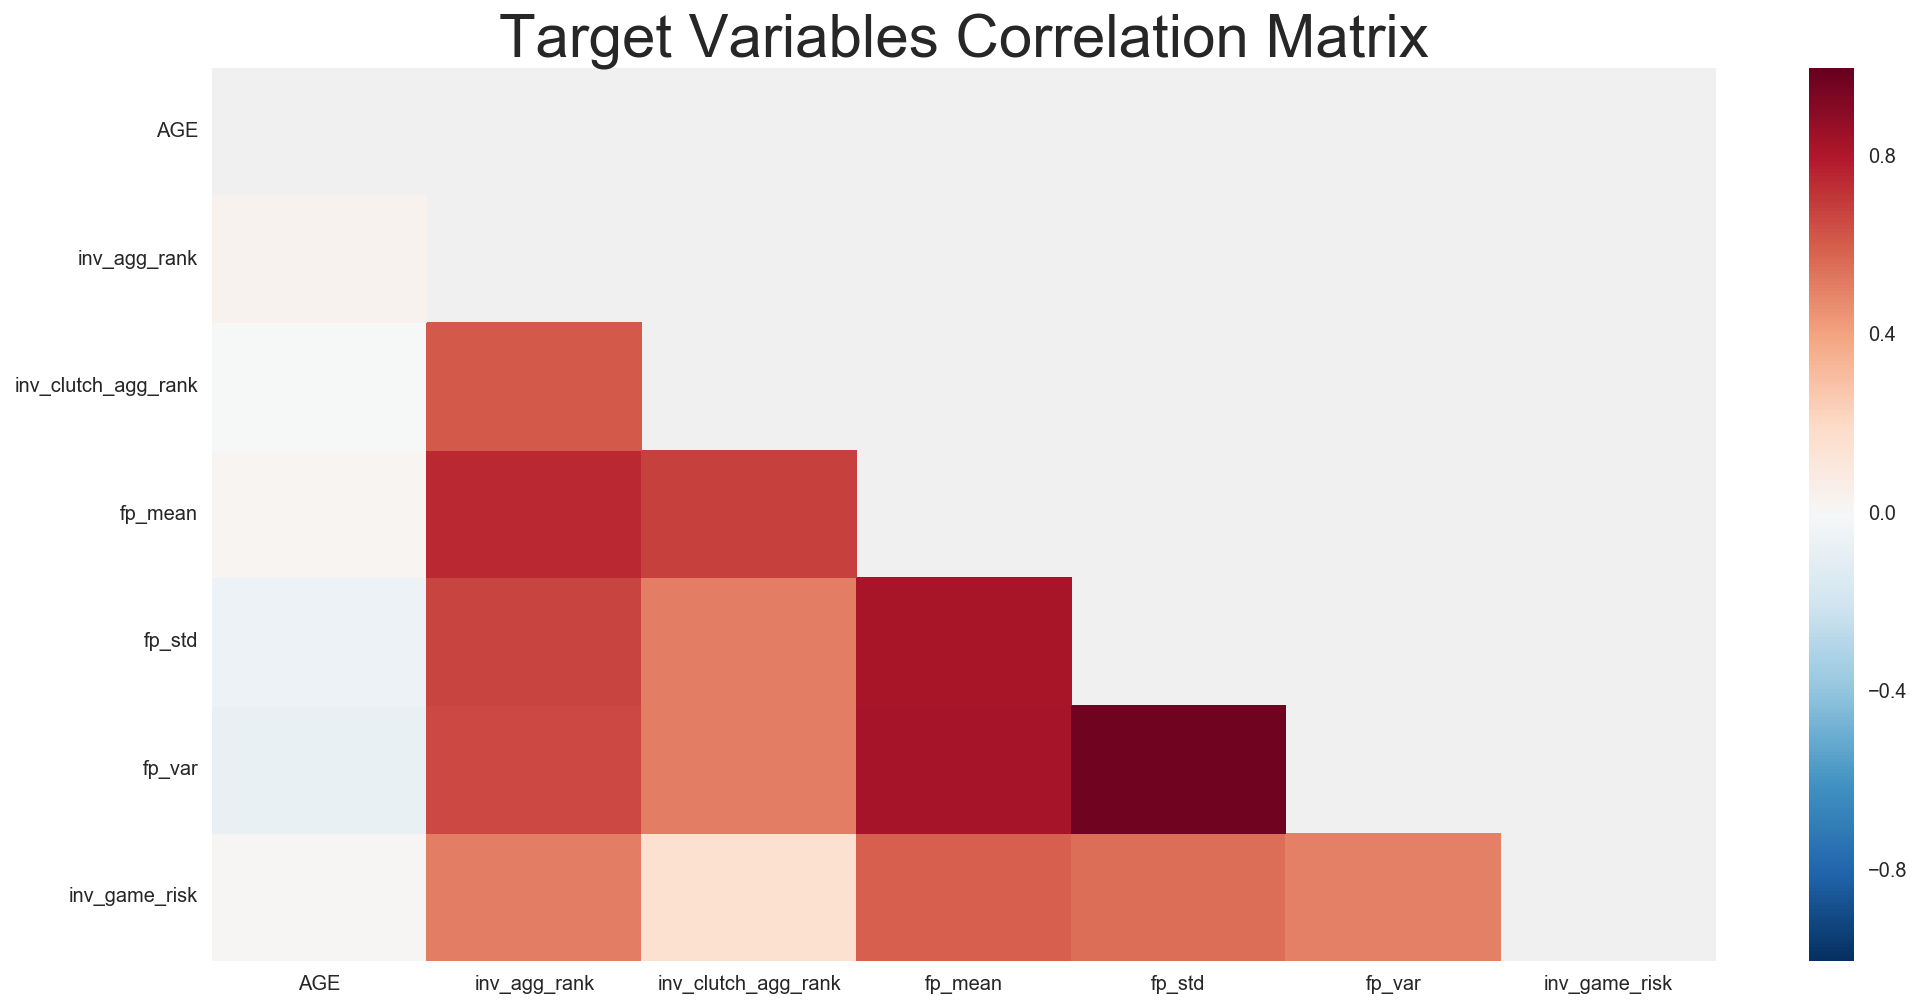

In [52]:
mask = np.zeros_like(target_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

ax = sns.heatmap(target_corr, mask=mask)

ax.set_title('Target Variables Correlation Matrix', size=30)
plt.show()

In [90]:
df_season_game_risk = pd.DataFrame(df_complete_target.groupby(['SEASON', 'game_risk'])['game_risk'].count())

In [91]:
tmp2 = df_season_game_risk.rename(columns={'game_risk':'counts'}).reset_index()

In [92]:
tmp2.head(10)

,SEASON,game_risk,counts
0,1996-97,0.0,143
1,1996-97,1.0,80
2,1996-97,2.0,89
3,1996-97,3.0,128
4,1997-98,0.0,149
5,1997-98,1.0,73
6,1997-98,2.0,90
7,1997-98,3.0,127
8,1998-99,0.0,176
9,1998-99,1.0,61


In [93]:
tmp2.SEASON = [int(season[:4]) for season in tmp2.SEASON]

In [94]:
tmp2.game_risk = tmp2.game_risk.astype(str)

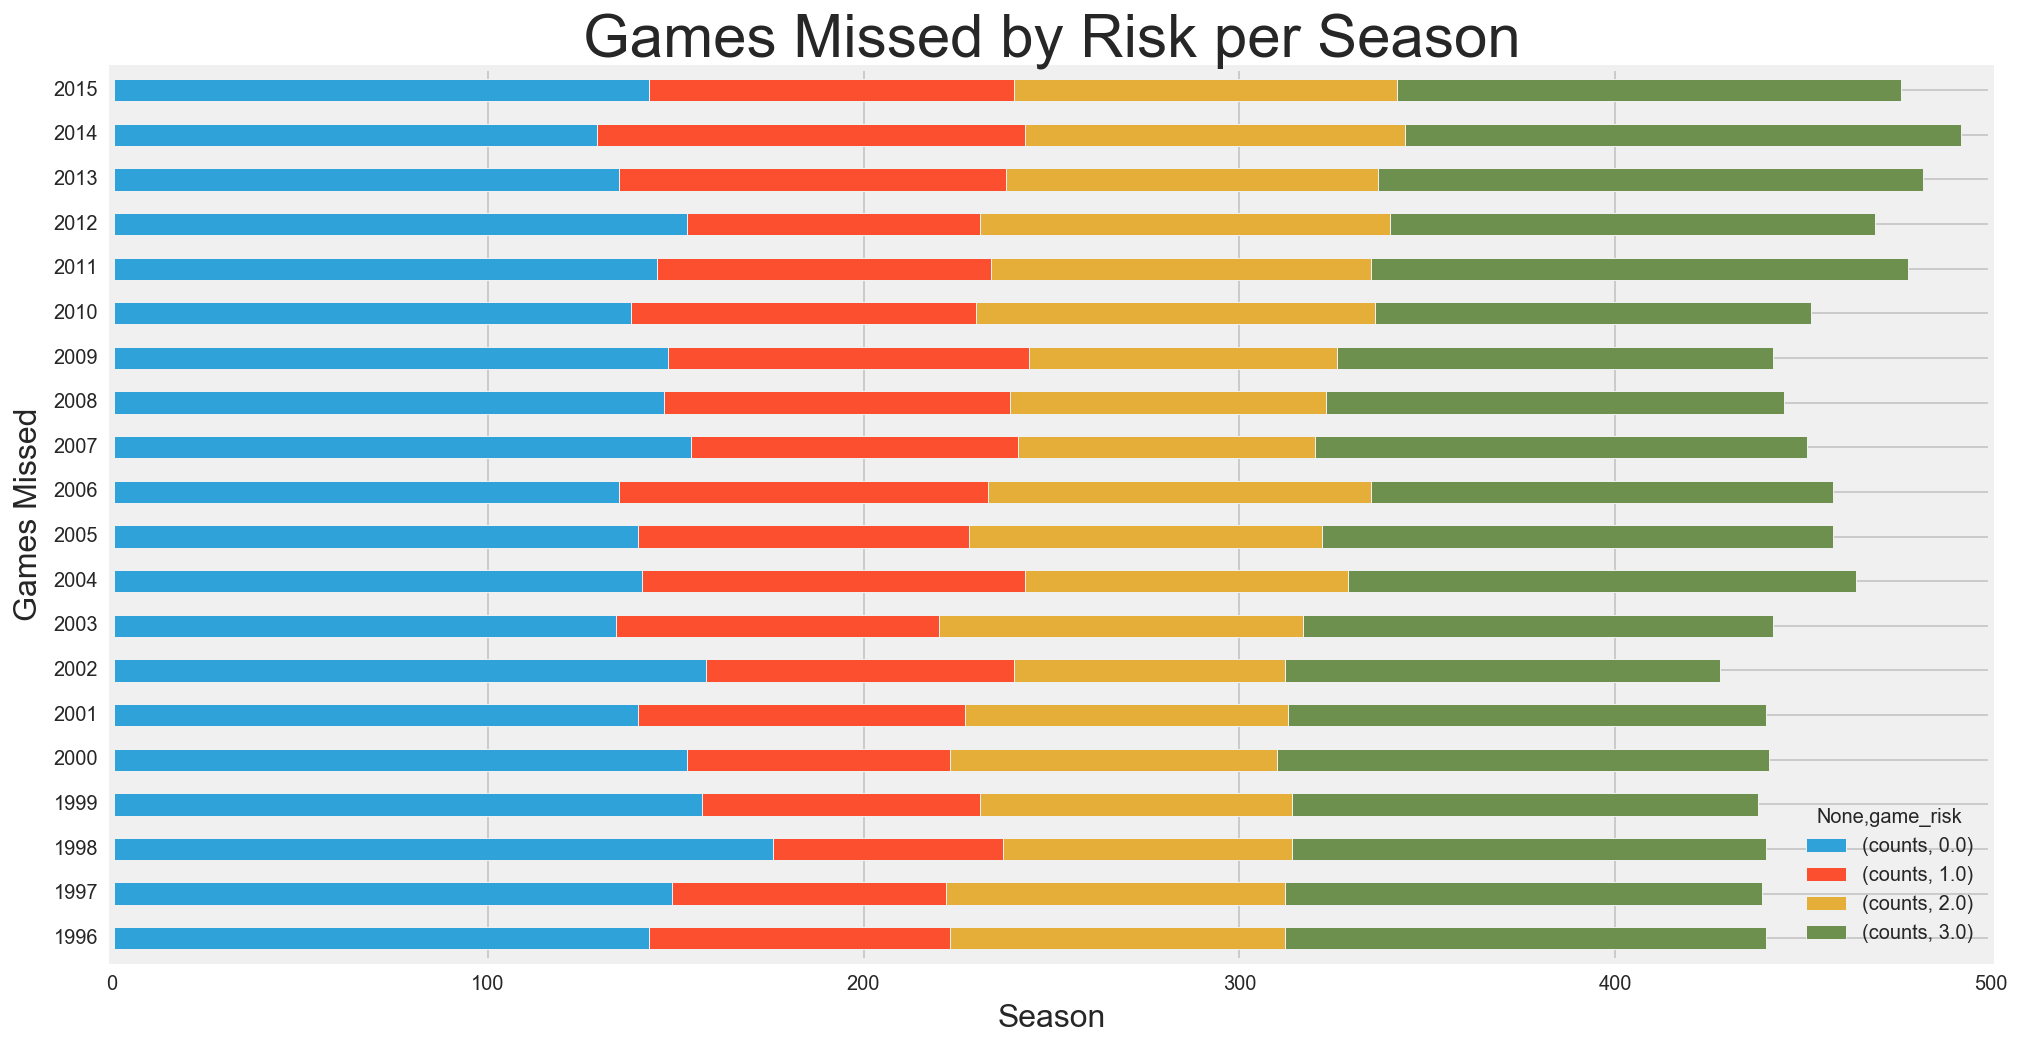

In [95]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

tmp2.groupby(['SEASON', 'game_risk']).sum().unstack('game_risk').plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Season', size=16)
ax.set_ylabel('Games Missed', size=16)
ax.set_title('Games Missed by Risk per Season', size=30)
plt.show()

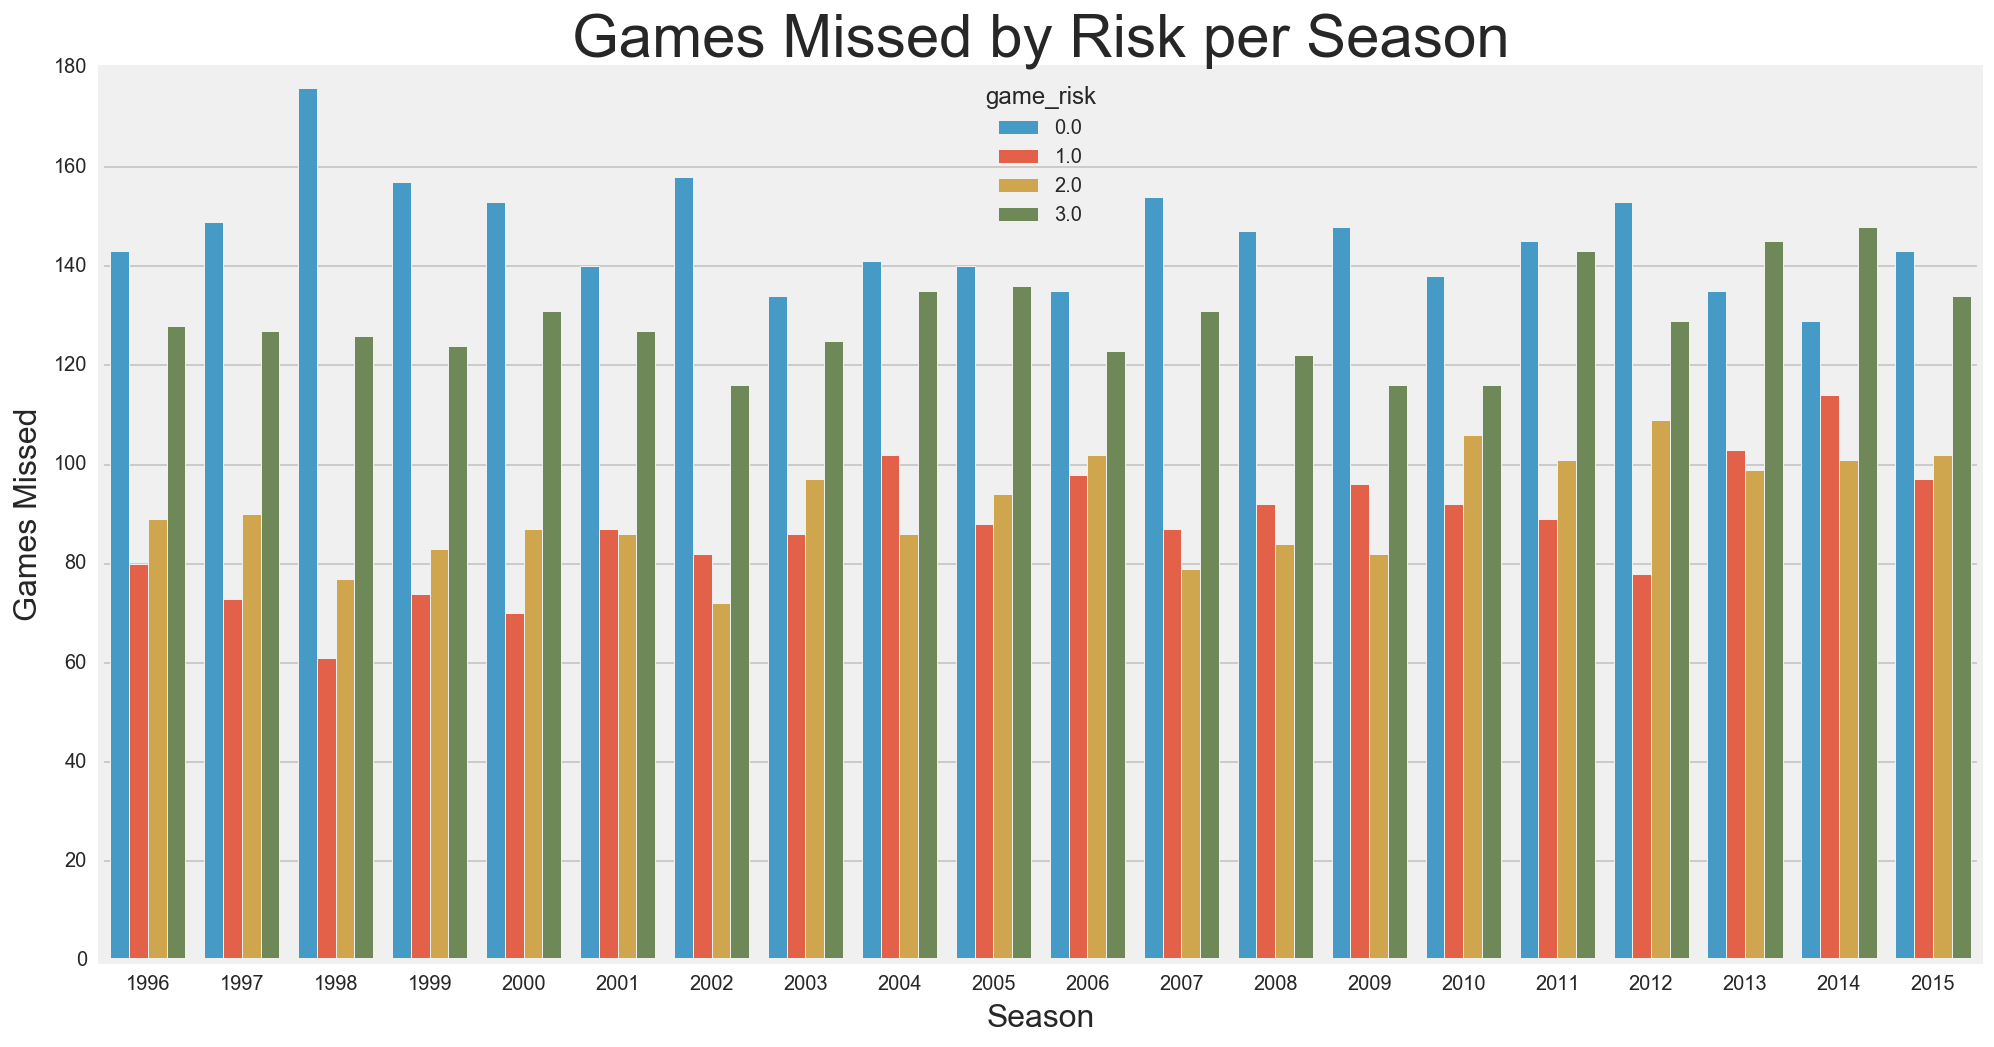

In [96]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.barplot('SEASON', 'counts', data=tmp2, hue='game_risk', ax=ax)
ax.set_xlabel('Season', size=16)
ax.set_ylabel('Games Missed', size=16)
ax.set_title('Games Missed by Risk per Season', size=30)
plt.show()

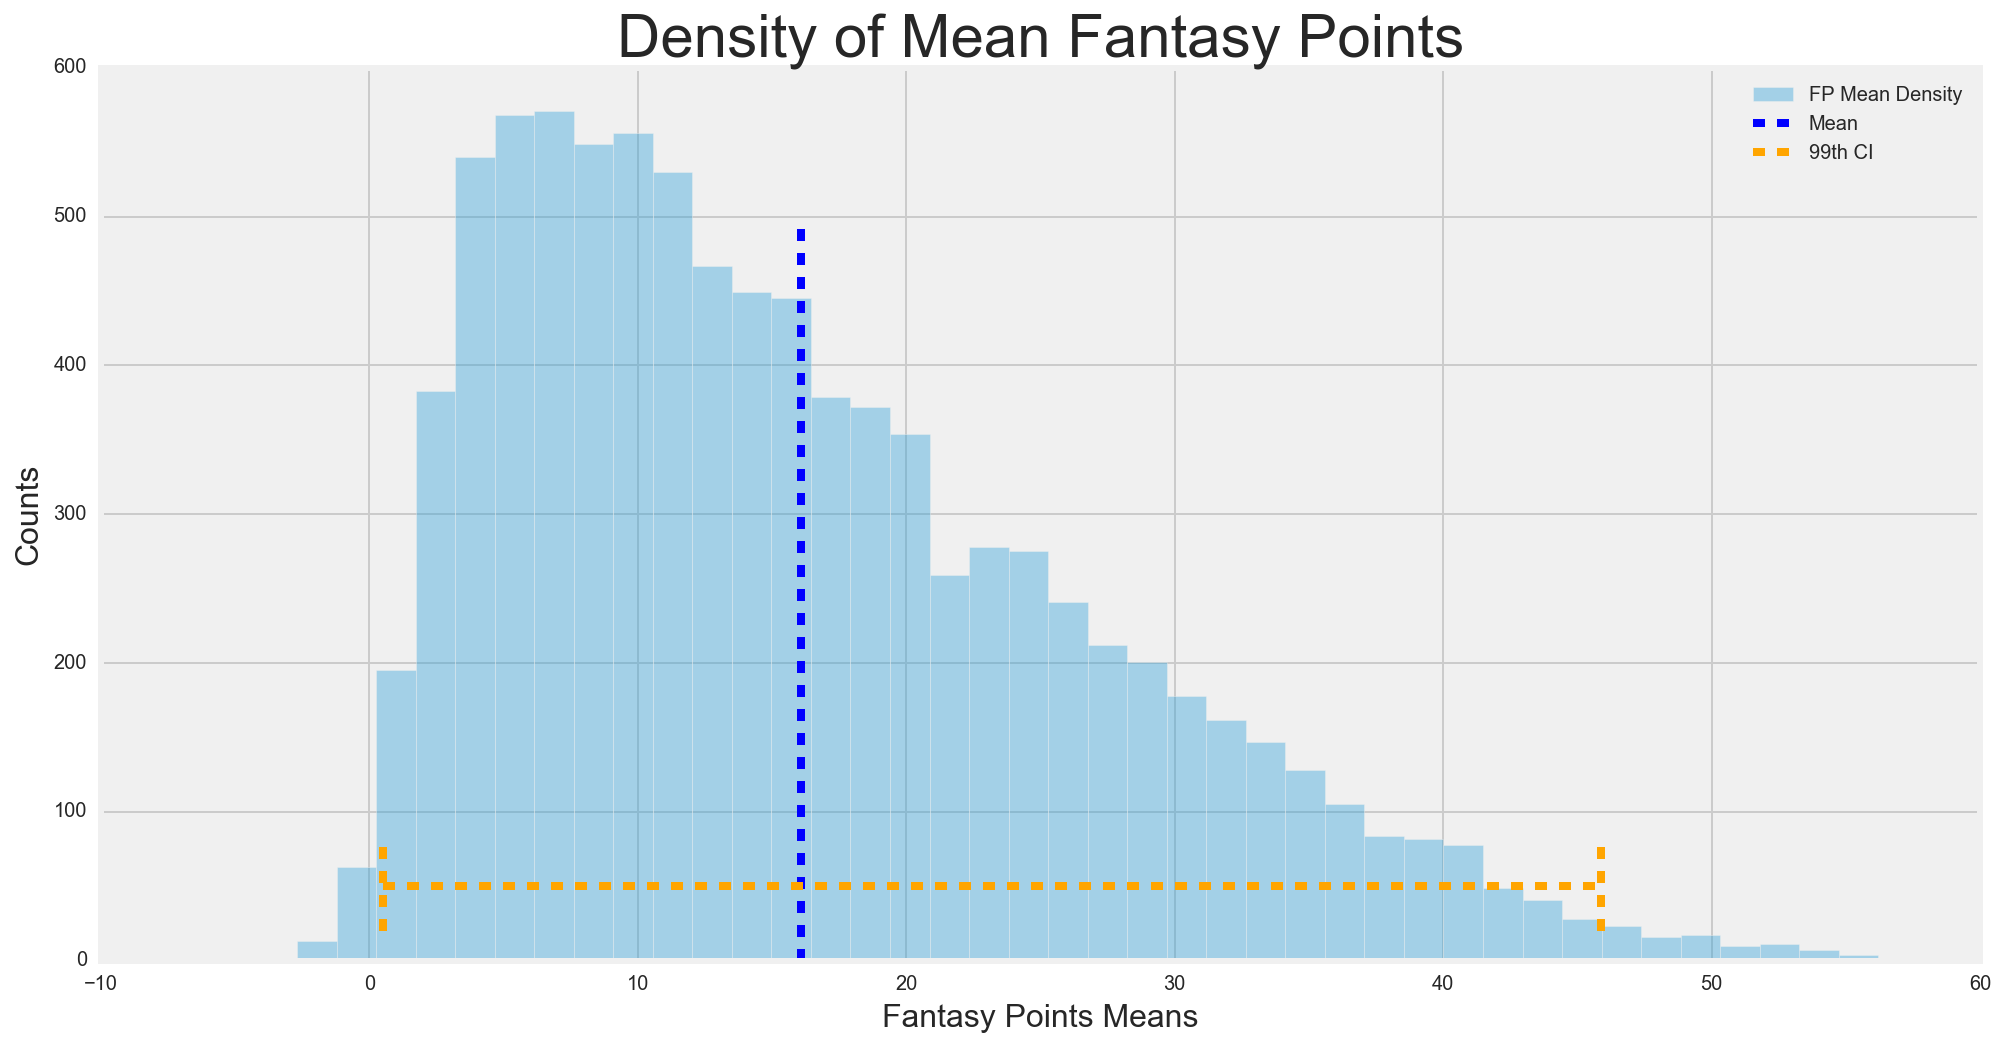

Mean 16.0680434288
1st Percentile 0.517590909091
99th Percentile 45.886405546
Min -5.63636363636
Max 57.6869809203


In [97]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['fp_mean'], kde=False, ax=ax, label='FP Mean Density')
ax.vlines(df_complete_target['fp_mean'].mean(), 0, 500, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['fp_mean'], 99), 20, 80, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['fp_mean'], 1), 20, 80, linestyles='dashed', color='orange')
ax.hlines(50, np.percentile(df_complete_target['fp_mean'], 1), np.percentile(df_complete_target['fp_mean'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Fantasy Points Means', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Mean Fantasy Points', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['fp_mean'].mean()
print '1st Percentile', np.percentile(df_complete_target['fp_mean'], 1)
print '99th Percentile', np.percentile(df_complete_target['fp_mean'], 99)
print 'Min', df_complete_target['fp_mean'].min()
print 'Max', df_complete_target['fp_mean'].max()

In [98]:
df_complete_target.fp_std.dropna(inplace=True)

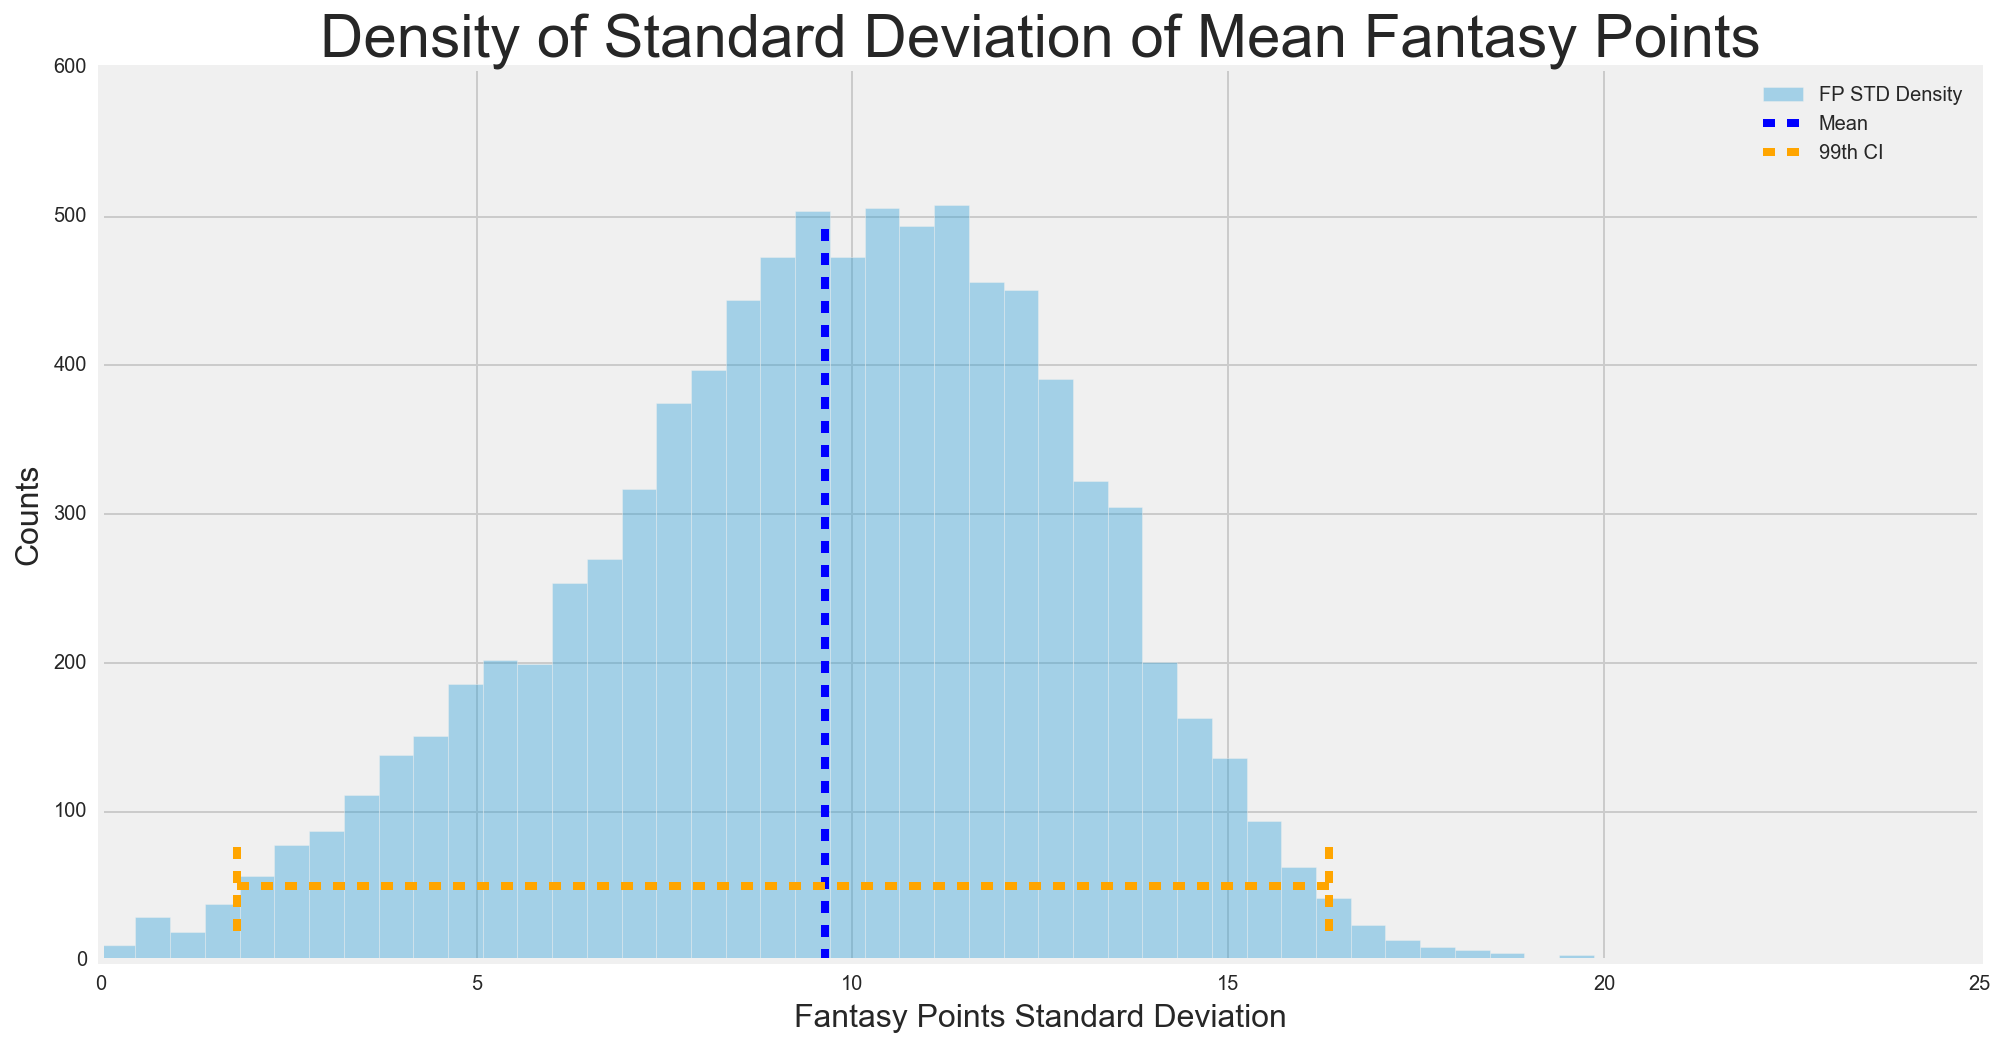

Mean 9.63770278125
1st Percentile 1.81394918983
99th Percentile 16.3434117619
Min 0.0
Max 23.0956646857


In [99]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['fp_std'], kde=False, ax=ax, label='FP STD Density')
ax.vlines(df_complete_target['fp_std'].mean(), 0, 500, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['fp_std'], 99), 20, 80, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['fp_std'], 1), 20, 80, linestyles='dashed', color='orange')
ax.hlines(50, np.percentile(df_complete_target['fp_std'], 1), np.percentile(df_complete_target['fp_std'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Fantasy Points Standard Deviation', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Standard Deviation of Mean Fantasy Points', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['fp_std'].mean()
print '1st Percentile', np.percentile(df_complete_target['fp_std'], 1)
print '99th Percentile', np.percentile(df_complete_target['fp_std'], 99)
print 'Min', df_complete_target['fp_std'].min()
print 'Max', df_complete_target['fp_std'].max()

In [100]:
df_complete_target.fp_var.dropna(inplace=True)

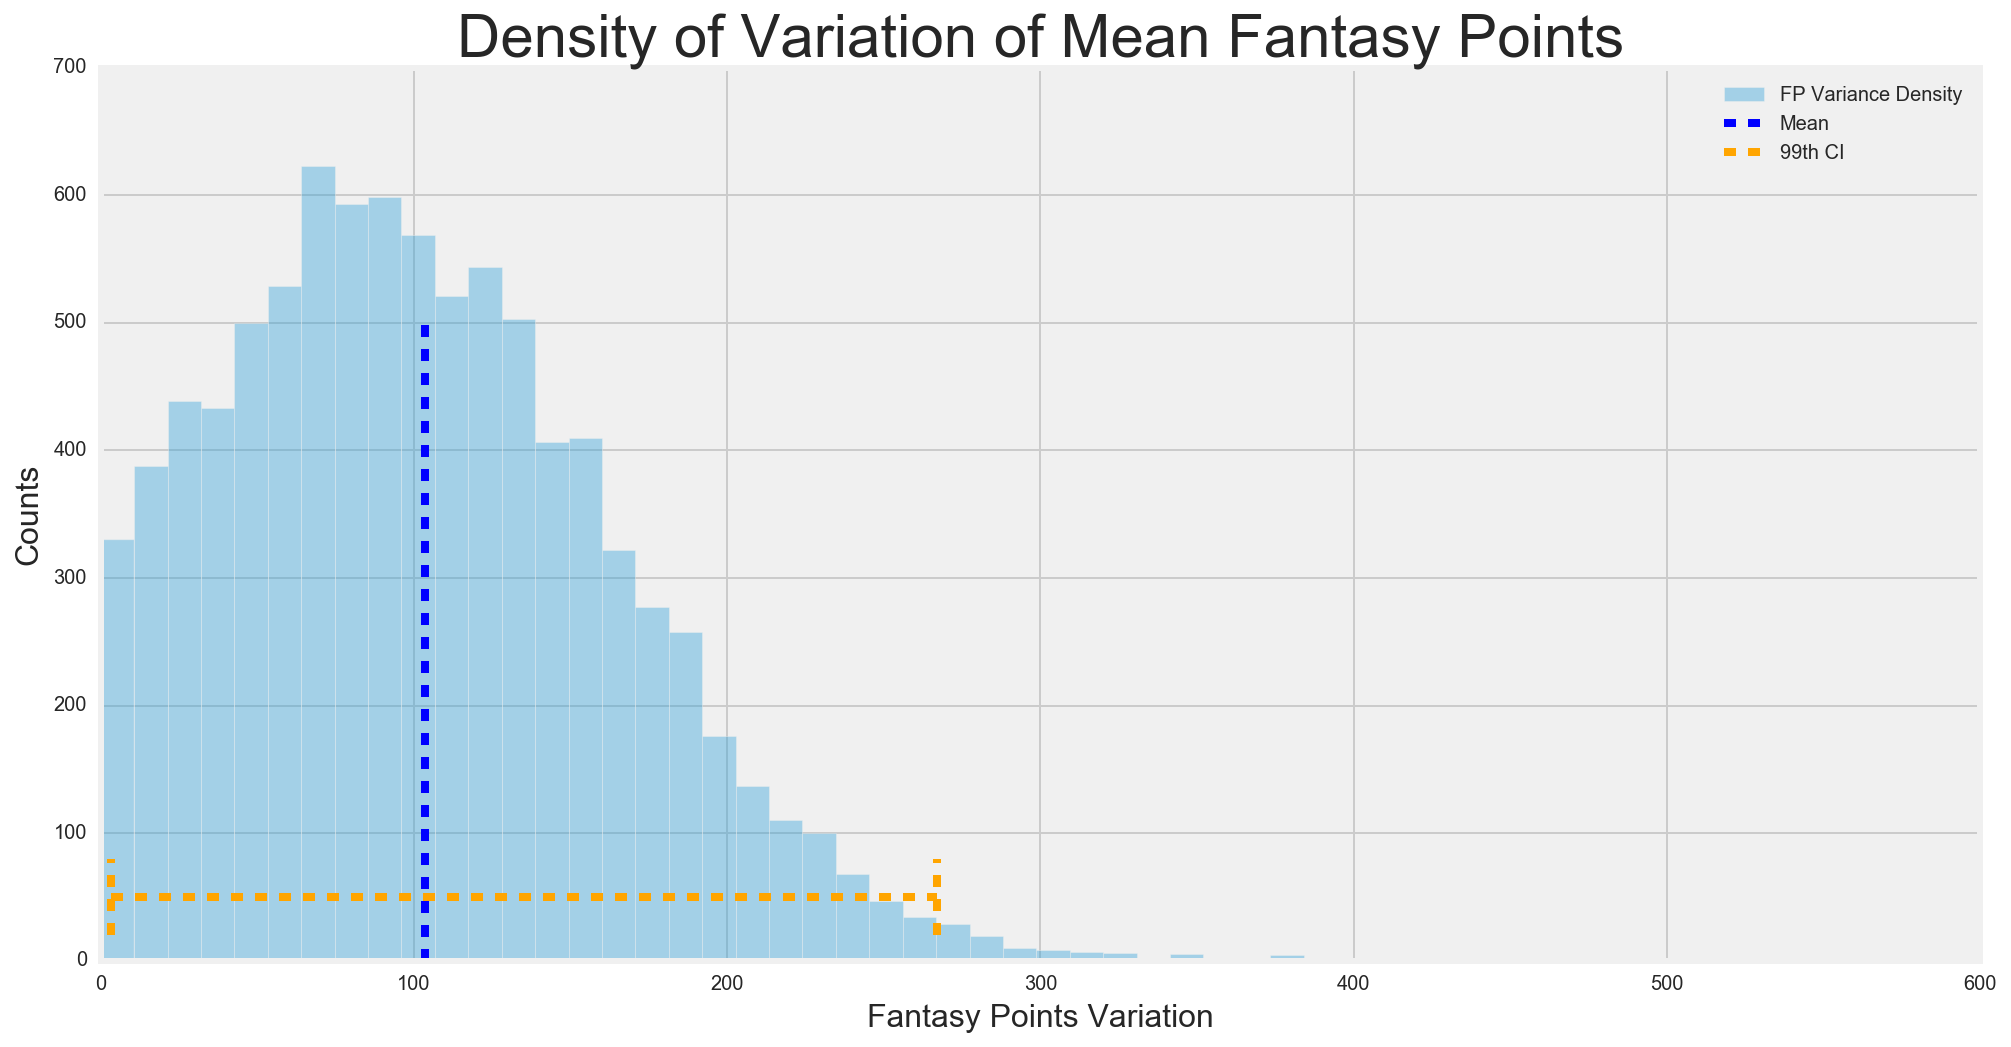

Mean 103.574063718
1st Percentile 3.29042680048
99th Percentile 267.107116474
Min 0.0
Max 533.409727273


In [101]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['fp_var'], kde=False, ax=ax, label='FP Variance Density')
ax.vlines(df_complete_target['fp_var'].mean(), 0, 500, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['fp_var'], 99), 20, 80, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['fp_var'], 1), 20, 80, linestyles='dashed', color='orange')
ax.hlines(50, np.percentile(df_complete_target['fp_var'], 1), np.percentile(df_complete_target['fp_var'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Fantasy Points Variation', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Variation of Mean Fantasy Points', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['fp_var'].mean()
print '1st Percentile', np.percentile(df_complete_target['fp_var'], 1)
print '99th Percentile', np.percentile(df_complete_target['fp_var'], 99)
print 'Min', df_complete_target['fp_var'].min()
print 'Max', df_complete_target['fp_var'].max()

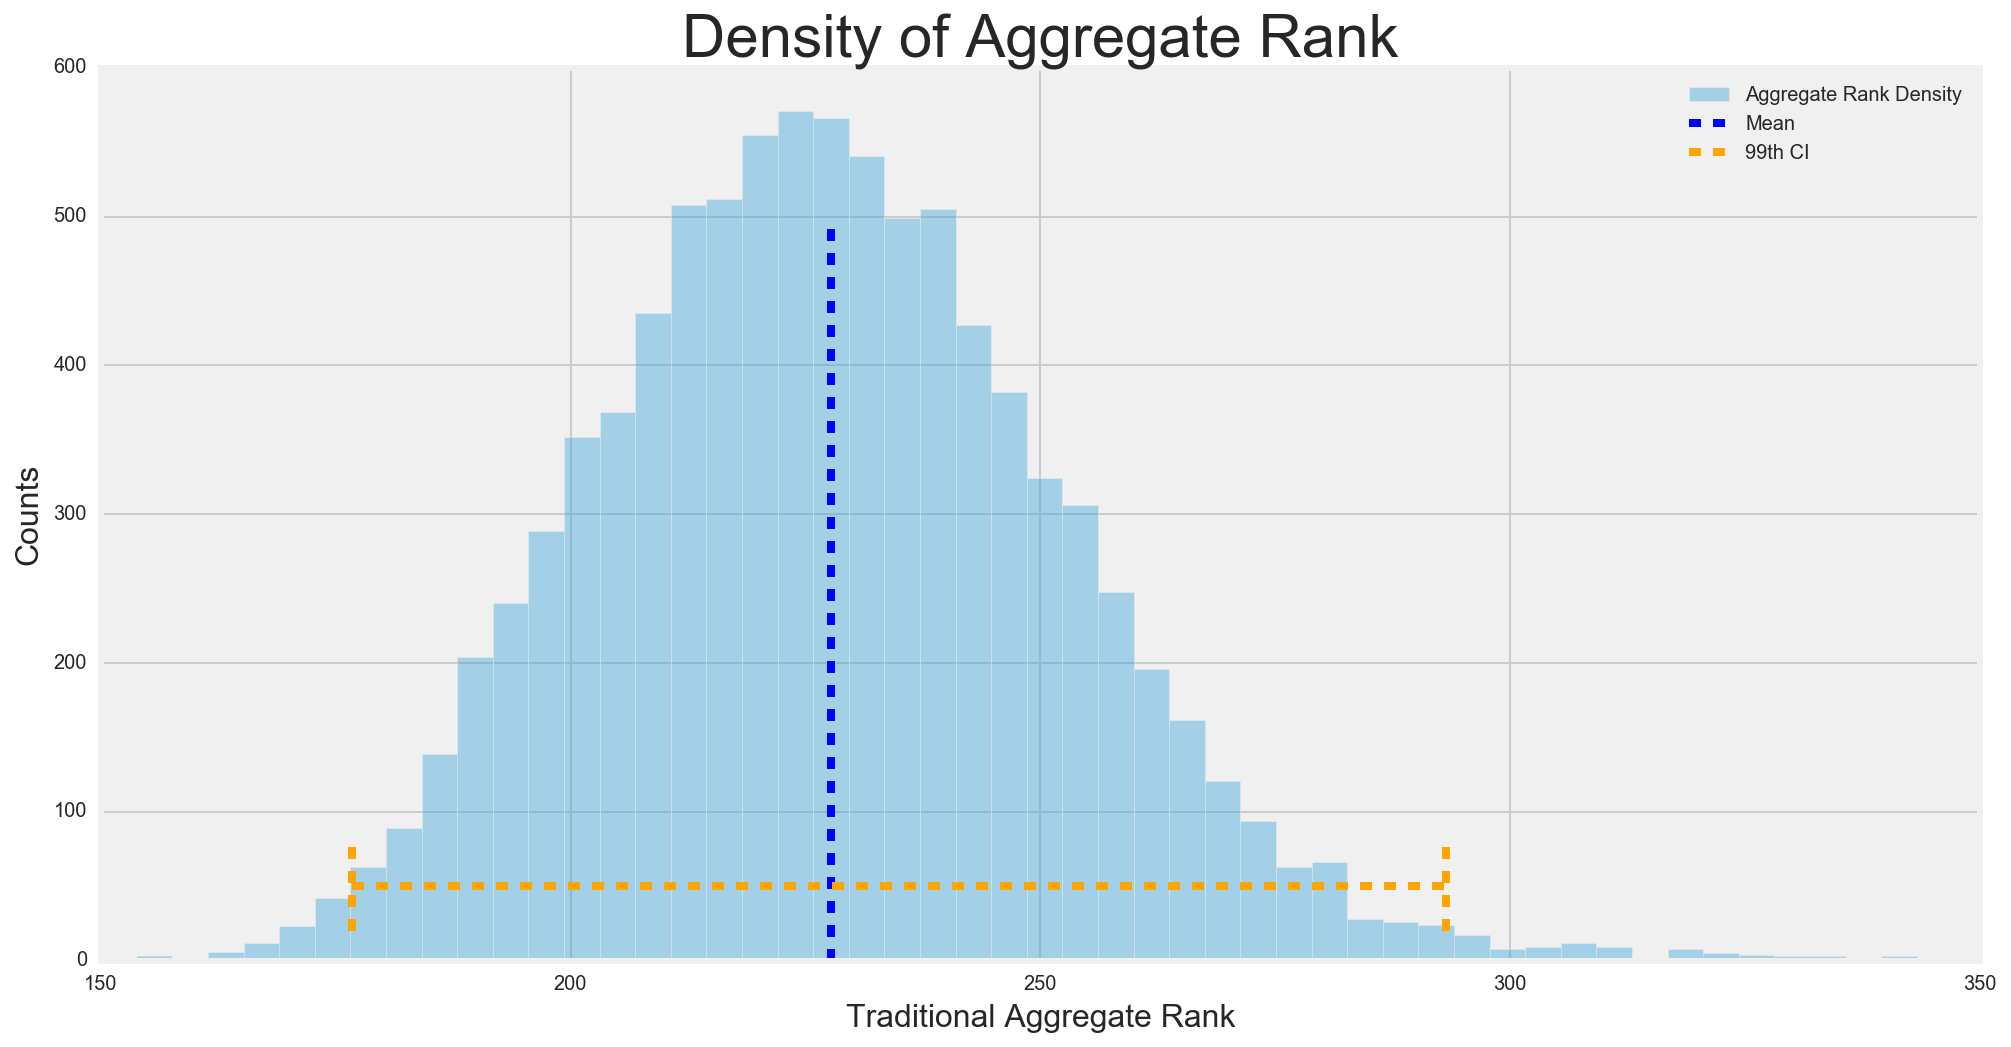

Mean 227.74912764
1st Percentile 176.720392157
99th Percentile 293.20117647
Min 153.833333333
Max 343.274509804


In [102]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['agg_rank'], kde=False, ax=ax, label='Aggregate Rank Density')
ax.vlines(df_complete_target['agg_rank'].mean(), 0, 500, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['agg_rank'], 99), 20, 80, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['agg_rank'], 1), 20, 80, linestyles='dashed', color='orange')
ax.hlines(50, np.percentile(df_complete_target['agg_rank'], 1), np.percentile(df_complete_target['agg_rank'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Traditional Aggregate Rank', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Aggregate Rank', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['agg_rank'].mean()
print '1st Percentile', np.percentile(df_complete_target['agg_rank'], 1)
print '99th Percentile', np.percentile(df_complete_target['agg_rank'], 99)
print 'Min', df_complete_target['agg_rank'].min()
print 'Max', df_complete_target['agg_rank'].max()

In [103]:
df_complete_target.clutch_agg_rank.dropna(inplace=True)

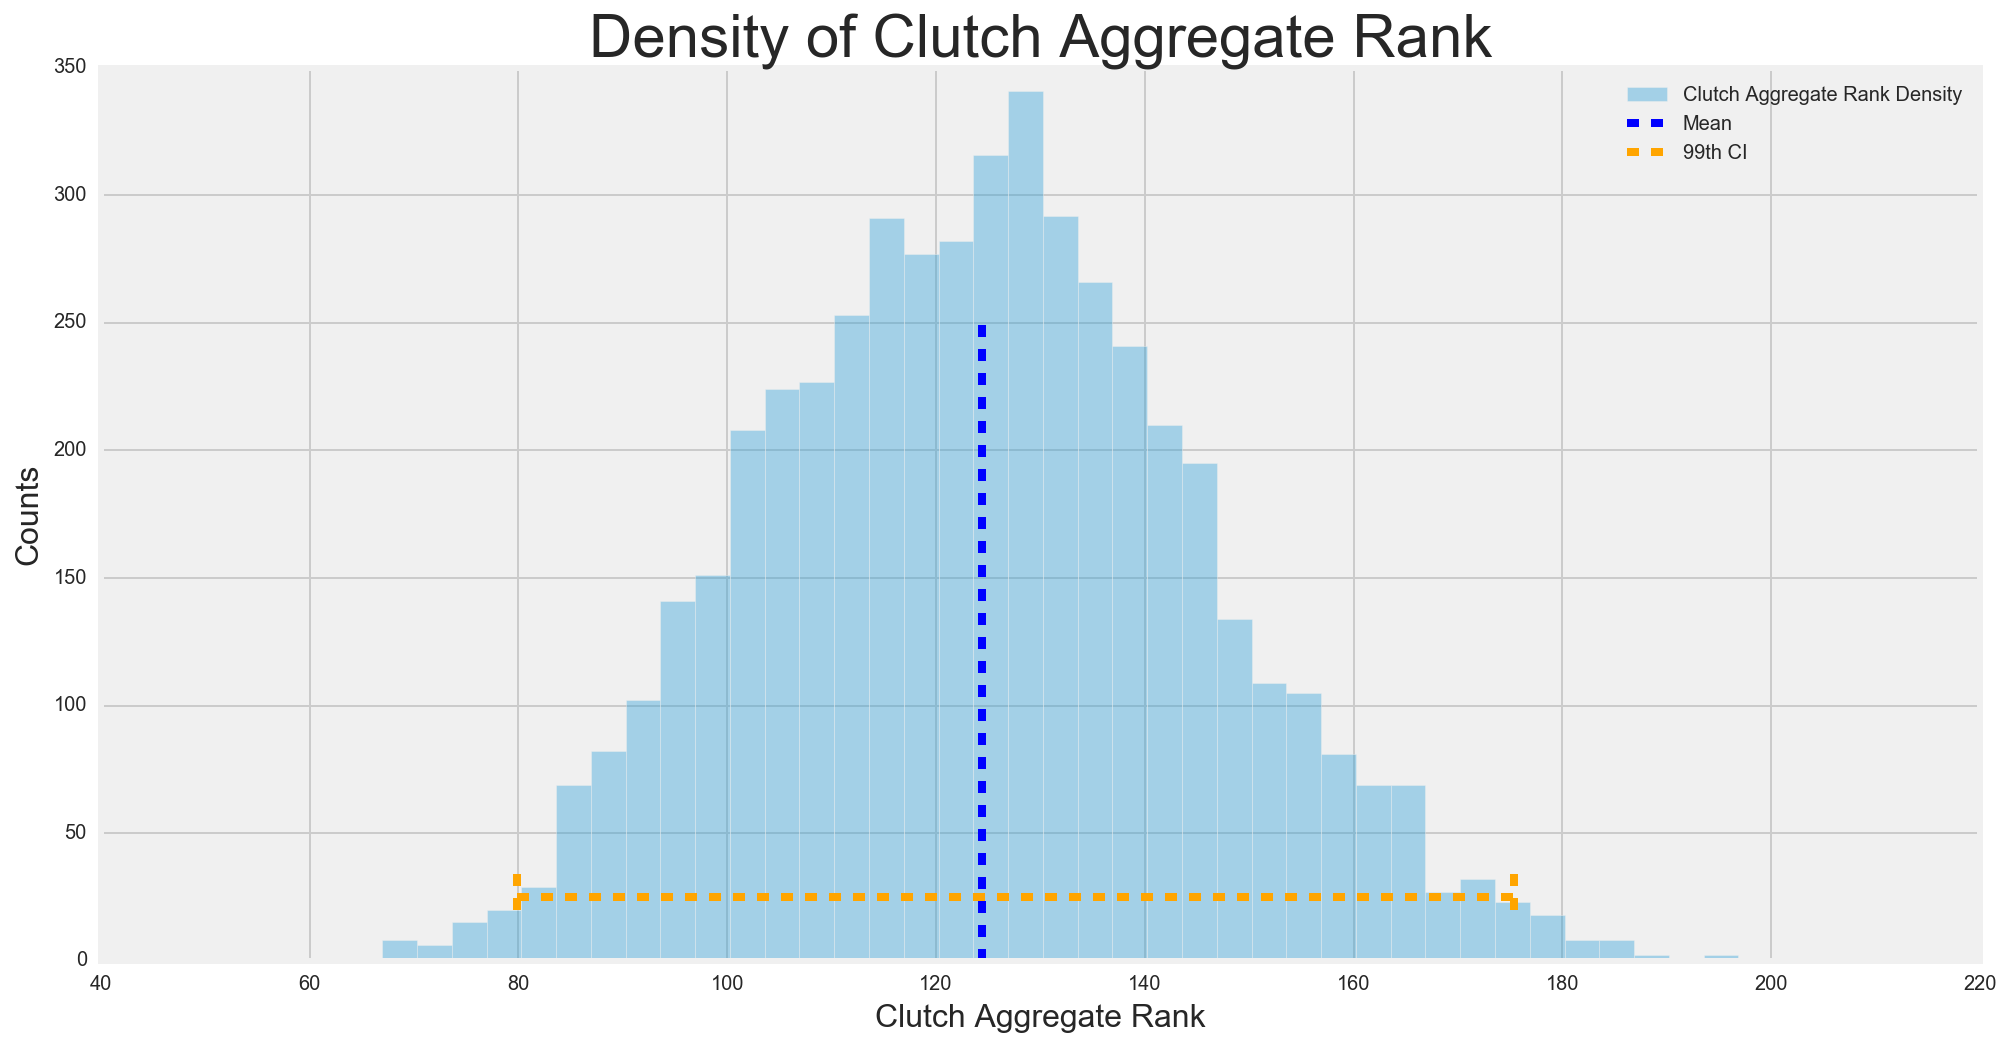

Mean 124.449539047
1st Percentile 79.9156626506
99th Percentile 175.39686747
Min 50.3012048193
Max 206.855421687


In [104]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['clutch_agg_rank'], kde=False, ax=ax, label='Clutch Aggregate Rank Density')
ax.vlines(df_complete_target['clutch_agg_rank'].mean(), 0, 250, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['clutch_agg_rank'], 99), 20, 35, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['clutch_agg_rank'], 1), 20, 35, linestyles='dashed', color='orange')
ax.hlines(25, np.percentile(df_complete_target['clutch_agg_rank'], 1), np.percentile(df_complete_target['clutch_agg_rank'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Clutch Aggregate Rank', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Clutch Aggregate Rank', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['clutch_agg_rank'].mean()
print '1st Percentile', np.percentile(df_complete_target['clutch_agg_rank'], 1)
print '99th Percentile', np.percentile(df_complete_target['clutch_agg_rank'], 99)
print 'Min', df_complete_target['clutch_agg_rank'].min()
print 'Max', df_complete_target['clutch_agg_rank'].max()